# Unsupervised Learning and Ensemble Learning to Generate New Target Variable

In [1]:
#Importing necessary packages

import os
import numpy as np
import sklearn
import pandas as pd
import random
from scipy import stats

#For plotting

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm
#import shapely
#import geopandas
import plotly.figure_factory as ff
import seaborn as sns
#from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from mpl_toolkits import mplot3d

#path = '/Users/kimberlyharris/Documents/exoplanet_transit-main/alldata_analysis/'
from coclust.evaluation.external import accuracy

#CHANGE THIS ON YOUR END!
path = '/Users/kimberlyharris/Documents/exoplanet_transit-main/alldata_analysis/part2_ensemble'
os.chdir(path)

from numpy import linalg as LA
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from numba import jit #To run the code faster, translates internally to C++, computes and returns from random import randrange
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

random.seed(256)

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:18: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


## Load the data and look at it

In [2]:
data_normalized=pd.read_csv('alldata_normalized_pca.csv')
#result=pd.read_csv('data_not_normalized_result.csv')
#result=pd.read_csv(path+'data_pca.csv')

In [3]:
del data_normalized["Unnamed: 0"]

In [4]:
data_normalized

,default_flag,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,...,discoverymethod_asnum,disc_instrument_asnum,pl_tsystemref_asnum,st_spectype_asnum,st_metratio_asnum,pl_bmassprov_asnum,pca_dim_1,pca_dim_2,pca_dim_3,sy_pnum_asnum
0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.244444,1.000000,0.712719,0.600000,0.666667,2.294510,1.134785,-1.321424,1.0
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.244444,1.000000,0.875731,0.466667,0.666667,2.173722,1.068315,-1.310701,1.0
2,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.455556,1.000000,0.750000,0.600000,0.666667,2.474929,1.631971,-0.644790,1.0
3,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.466667,0.750000,0.879386,0.525000,0.583333,2.719732,0.300032,-0.189554,2.0
4,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.785714,0.771930,0.366667,0.666667,1.877171,0.847515,-1.467423,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.8,0.477778,0.775510,0.538847,0.571429,0.666667,2.517068,0.926074,-0.845333,3.0
5308,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.689538,0.695524,-0.266141,3.0
5309,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.687248,0.698397,-0.275237,3.0
5310,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.455556,0.714286,0.469298,0.200000,0.666667,2.328210,1.027627,-1.180701,1.0


In [5]:
data_normalized.info()
data_normalized.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Columns: 260 entries, default_flag to sy_pnum_asnum
dtypes: float64(260)
memory usage: 10.5 MB


,default_flag,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,...,discoverymethod_asnum,disc_instrument_asnum,pl_tsystemref_asnum,st_spectype_asnum,st_metratio_asnum,pl_bmassprov_asnum,pca_dim_1,pca_dim_2,pca_dim_3,sy_pnum_asnum
count,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,...,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5312.000000,5.312000e+03,5.312000e+03,5312.000000
mean,0.484400,0.008283,0.362387,0.001318,0.000377,0.755083,0.004330,0.006401,0.033321,0.003389,...,0.853313,0.566487,0.489535,0.907218,0.549702,0.741489,0.000000,-6.420567e-17,2.140189e-17,1.761295
std,0.324812,0.090643,0.480735,0.036281,0.019402,0.430079,0.065665,0.079755,0.179490,0.058118,...,0.121964,0.177729,0.301858,0.193253,0.269333,0.341985,1.618750,1.104048e+00,8.651203e-01,1.151597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.682471,-2.487865e+00,-1.638125e+00,1.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.900000,0.577778,0.342857,0.921053,0.200000,0.666667,-1.504289,-5.212319e-01,-3.366104e-01,1.000000
50%,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.900000,0.577778,0.428571,1.000000,0.542857,1.000000,-0.924867,3.576347e-01,-1.220090e-01,1.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.900000,0.577778,0.666667,1.000000,0.800000,1.000000,1.552983,5.905475e-01,2.773685e-01,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.306245,2.543390e+00,3.623412e+00,8.000000


In [6]:
data_normalized["sy_pnum_asnum"].max()

8.0

In [7]:
data_normalized["sy_pnum_asnum"].min()

1.0

## See how the data is distributed

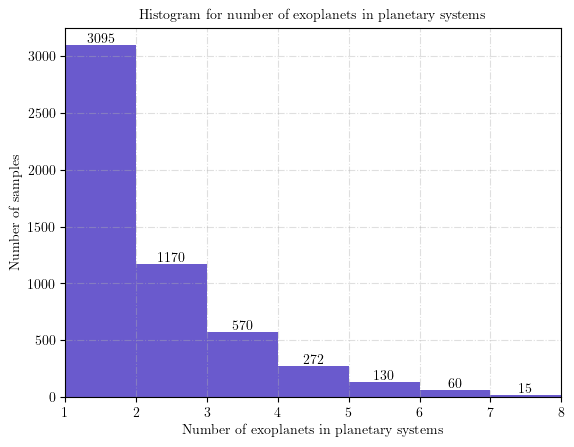

In [8]:
#Summary plot Mbh vs v_avg                                                                                                                                                                                                                    
plt.figure()

%matplotlib inline
dpi=300   #to make the plot bigger                                                                                                                                                                                                            
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'Histogram for number of exoplanets in planetary systems',fontsize=10)
plt.xlabel(r'Number of exoplanets in planetary systems',fontsize=10) #increase this!!!
plt.ylabel(r'Number of samples',fontsize=10)

#plt.hist(result["sy_pnum_asnum"], bins =7) #sy_pnum_asnum has value 0, this is for other exoplanets in same solar system
counts, edges, bars = plt.hist(data_normalized["sy_pnum_asnum"],bins =7,color='slateblue')
plt.bar_label(bars)

plt.xlim(1,8)
plt.show()

## Visualizing the Number of Planets in a Given Solar System

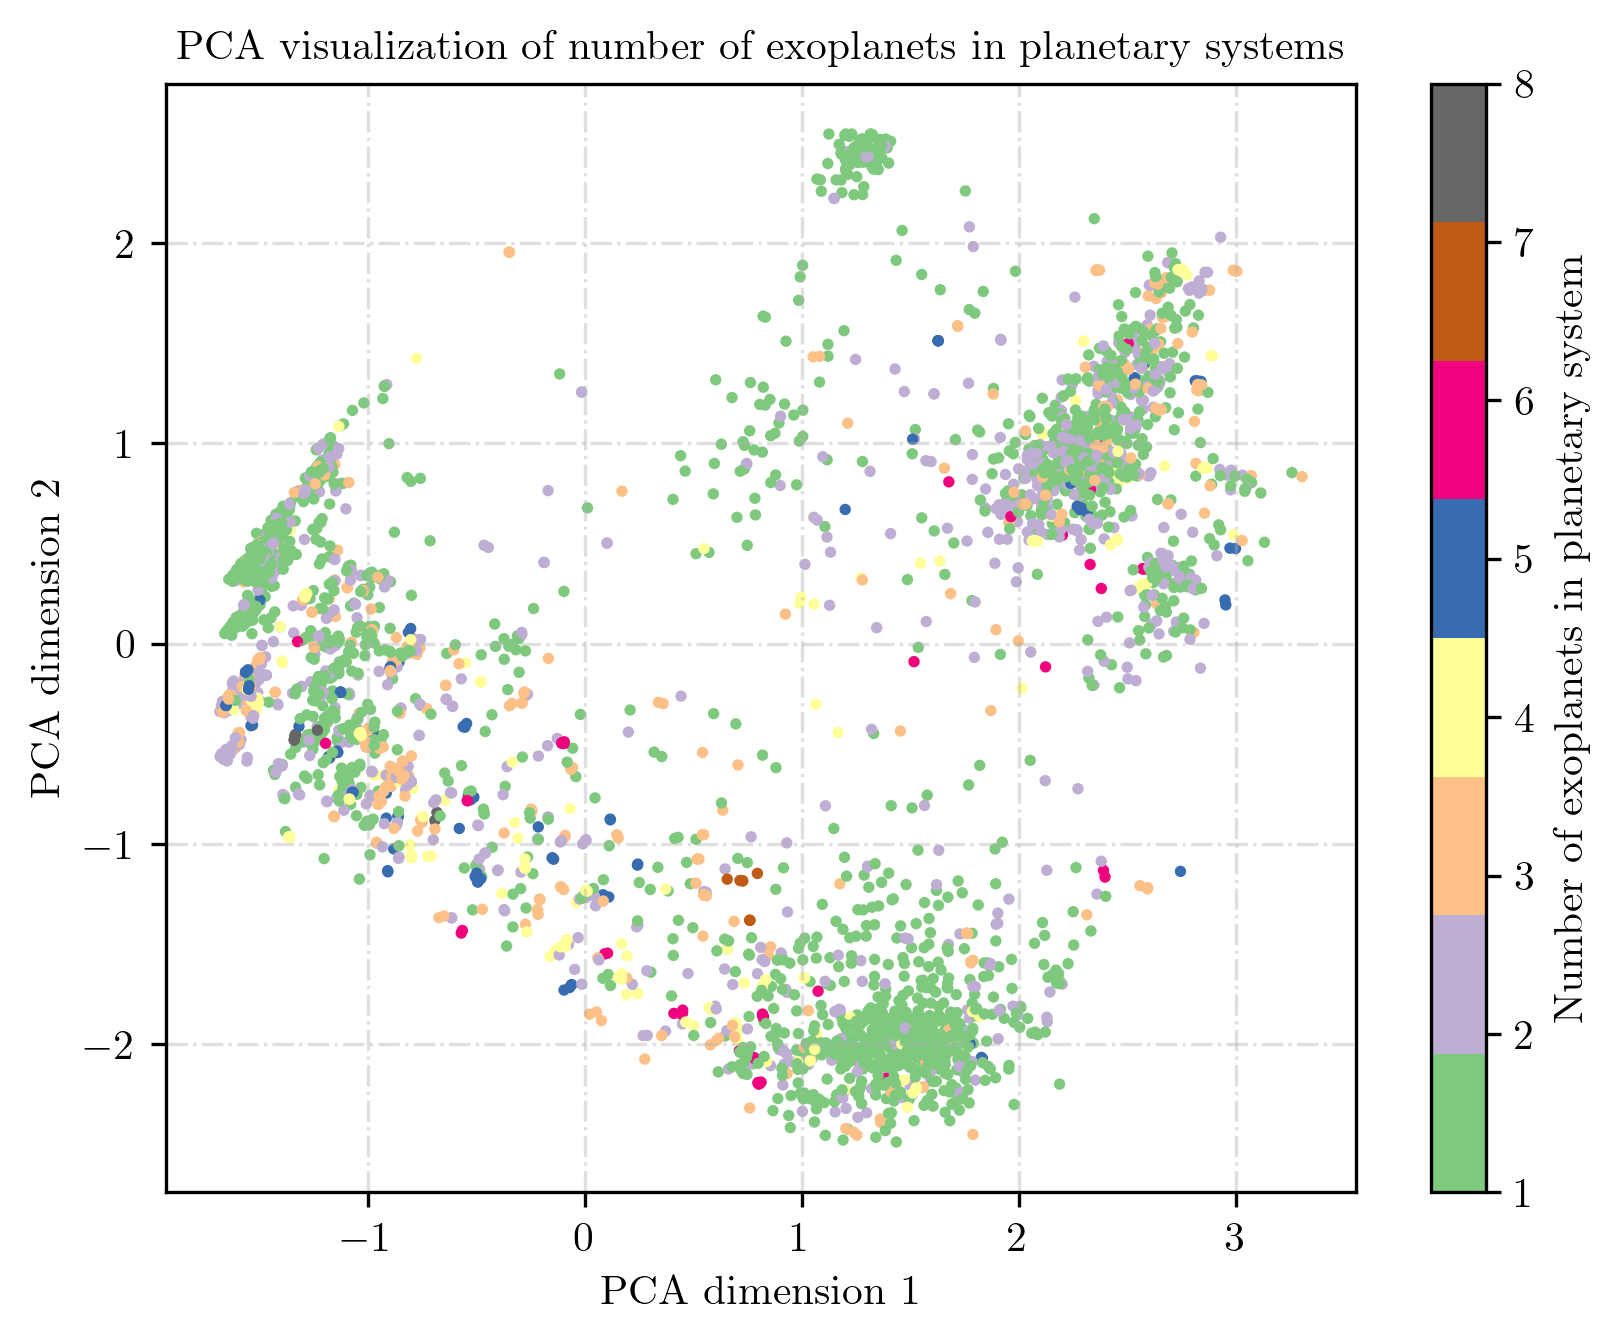

In [9]:
#Summary plot Mbh vs v_avg                                                                                                                                                                                                                    
plt.figure()

%matplotlib inline
dpi=300   #to make the plot bigger                                                                                                                                                                                                            
mpl.rcParams['figure.dpi']= dpi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.grid(True,ls='-.',alpha=.4)
plt.title(r'PCA visualization of number of exoplanets in planetary systems',fontsize=10)
plt.xlabel(r'PCA dimension 1',fontsize=10) #increase this?
plt.ylabel(r'PCA dimension 2',fontsize=10)
#PCA summarizes multidimensional data into 2 dimensions, in our case
#look at colors? make sure they make distinct groups
plt.scatter(data_normalized["pca_dim_1"], data_normalized['pca_dim_2'], s=12, marker=".", c=data_normalized["sy_pnum_asnum"], cmap='Accent')
cmin=min(data_normalized["sy_pnum_asnum"])
cmax=max(data_normalized["sy_pnum_asnum"])
plt.clim(cmin,cmax)
#plt.legend(fontsize=6);
plt.colorbar(label=r'Number of exoplanets in planetary system')
#plt.savefig(path+'plots/'+'summary_Mbh_v_avg.png')
plt.show()

In [10]:
data_normalized.copy()

,default_flag,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,...,discoverymethod_asnum,disc_instrument_asnum,pl_tsystemref_asnum,st_spectype_asnum,st_metratio_asnum,pl_bmassprov_asnum,pca_dim_1,pca_dim_2,pca_dim_3,sy_pnum_asnum
0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.244444,1.000000,0.712719,0.600000,0.666667,2.294510,1.134785,-1.321424,1.0
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.244444,1.000000,0.875731,0.466667,0.666667,2.173722,1.068315,-1.310701,1.0
2,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.455556,1.000000,0.750000,0.600000,0.666667,2.474929,1.631971,-0.644790,1.0
3,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.466667,0.750000,0.879386,0.525000,0.583333,2.719732,0.300032,-0.189554,2.0
4,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.785714,0.771930,0.366667,0.666667,1.877171,0.847515,-1.467423,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.8,0.477778,0.775510,0.538847,0.571429,0.666667,2.517068,0.926074,-0.845333,3.0
5308,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.689538,0.695524,-0.266141,3.0
5309,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.687248,0.698397,-0.275237,3.0
5310,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.455556,0.714286,0.469298,0.200000,0.666667,2.328210,1.027627,-1.180701,1.0


In [11]:
data_normalized_copy=data_normalized.copy()

In [12]:
data_normalized = data_normalized.drop(columns='sy_pnum_asnum')

In [13]:
len(data_normalized)

5312

# For ensemble learning

In [14]:
accuracy_list=list()
labels_list=np.zeros(len(data_normalized))

## k-means

In [15]:
#X_in=data_normalized.drop(columns='sy_pnum_asnum')
X_in = data_normalized.values #kmeans must pass np arrays, not pandas dfs, so thus we do .values

In [16]:
kmeans_result = KMeans(n_clusters=8, init='k-means++', random_state=256).fit(data_normalized)

In [17]:
labels = kmeans_result.labels_
labels

array([5, 5, 3, ..., 3, 5, 5], dtype=int32)

In [18]:
max(kmeans_result.labels_)

7

In [19]:
#Calculate an accuracy
#len(data_normalized[data_normalized_copy['sy_pnum_asnum']==labels])/len(data_normalized)

pip install scikit-learn==0.21.2

pip install coclust

pip install scikit-learn==0.22.2

In [20]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


In [21]:
accuracy_list.append(acc)

In [22]:
data_normalized

,default_flag,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,...,disc_telescope_asnum,discoverymethod_asnum,disc_instrument_asnum,pl_tsystemref_asnum,st_spectype_asnum,st_metratio_asnum,pl_bmassprov_asnum,pca_dim_1,pca_dim_2,pca_dim_3
0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.440000,0.8,0.244444,1.000000,0.712719,0.600000,0.666667,2.294510,1.134785,-1.321424
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413333,0.8,0.244444,1.000000,0.875731,0.466667,0.666667,2.173722,1.068315,-1.310701
2,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360000,0.8,0.455556,1.000000,0.750000,0.600000,0.666667,2.474929,1.631971,-0.644790
3,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.386667,0.8,0.466667,0.750000,0.879386,0.525000,0.583333,2.719732,0.300032,-0.189554
4,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.785714,0.771930,0.366667,0.666667,1.877171,0.847515,-1.467423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.573333,0.8,0.477778,0.775510,0.538847,0.571429,0.666667,2.517068,0.926074,-0.845333
5308,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.689538,0.695524,-0.266141
5309,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.687248,0.698397,-0.275237
5310,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360000,0.8,0.455556,0.714286,0.469298,0.200000,0.666667,2.328210,1.027627,-1.180701


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)

In [24]:
max(data_normalized_copy["sy_pnum_asnum"].values)

8.0

In [25]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

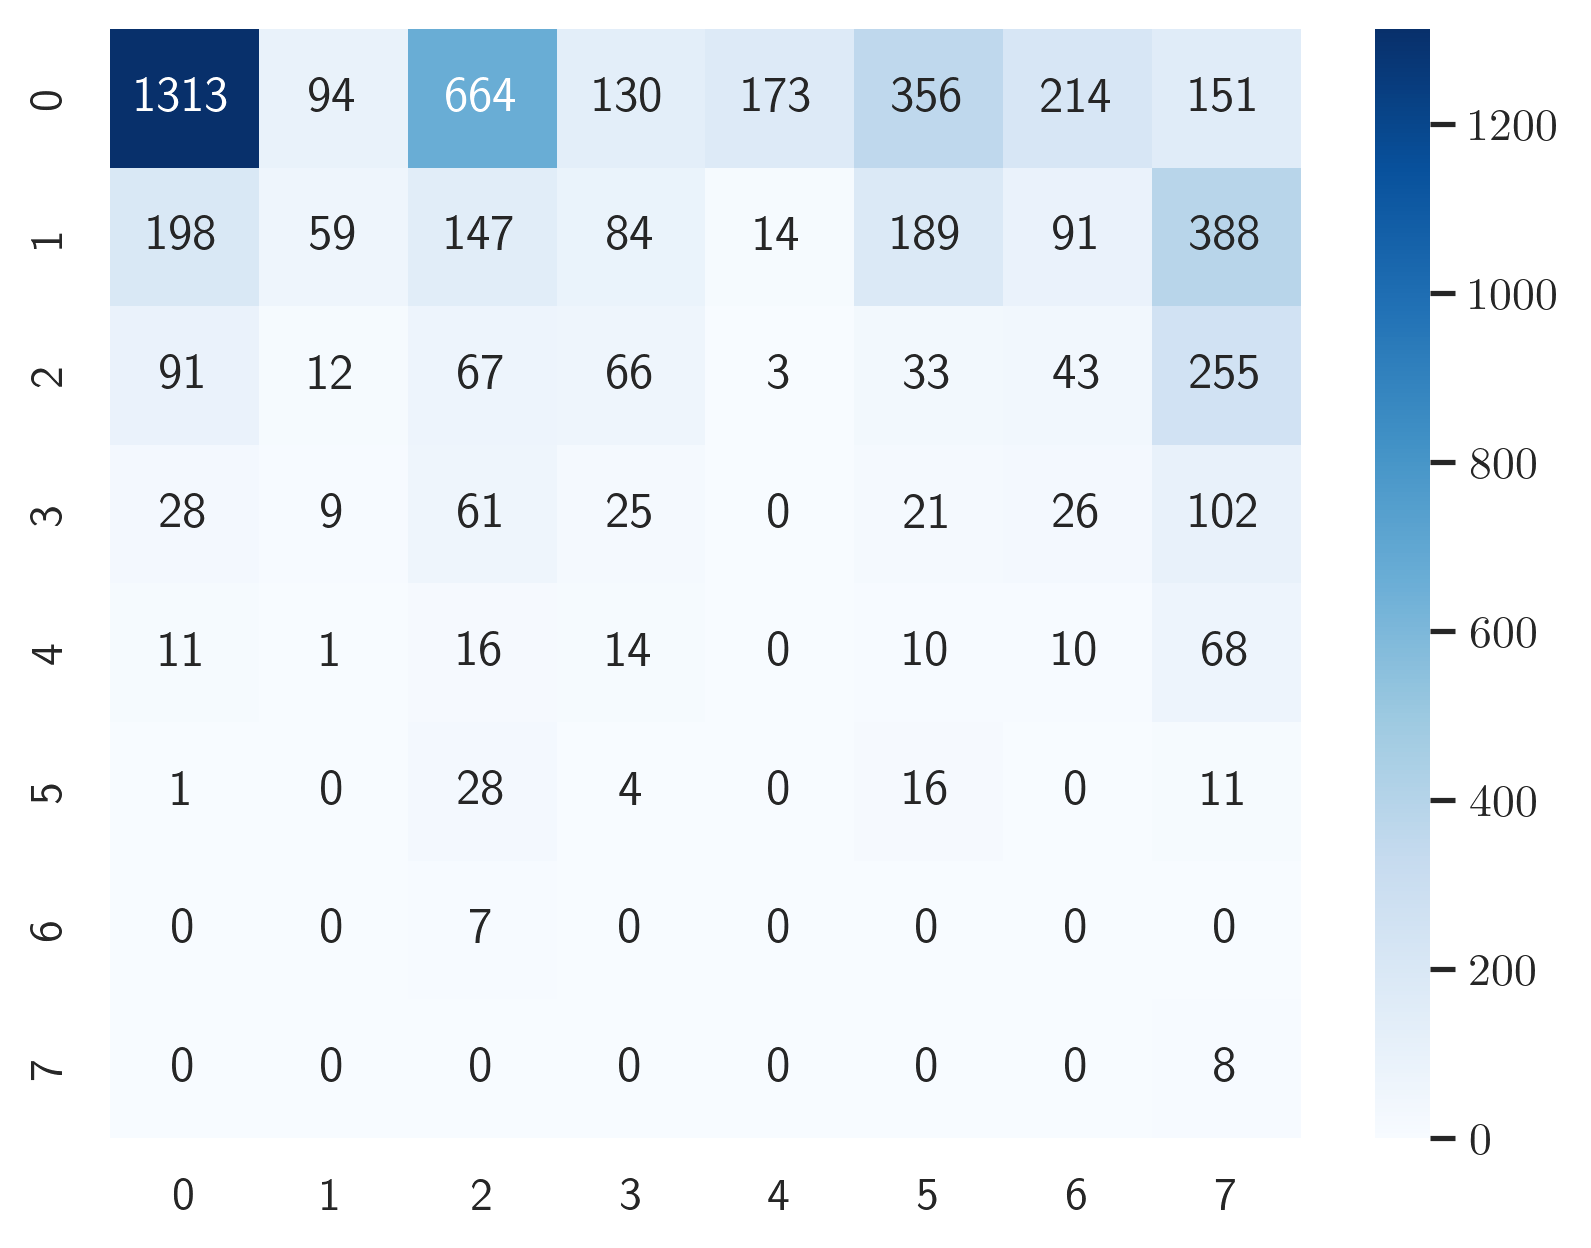

In [26]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [27]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


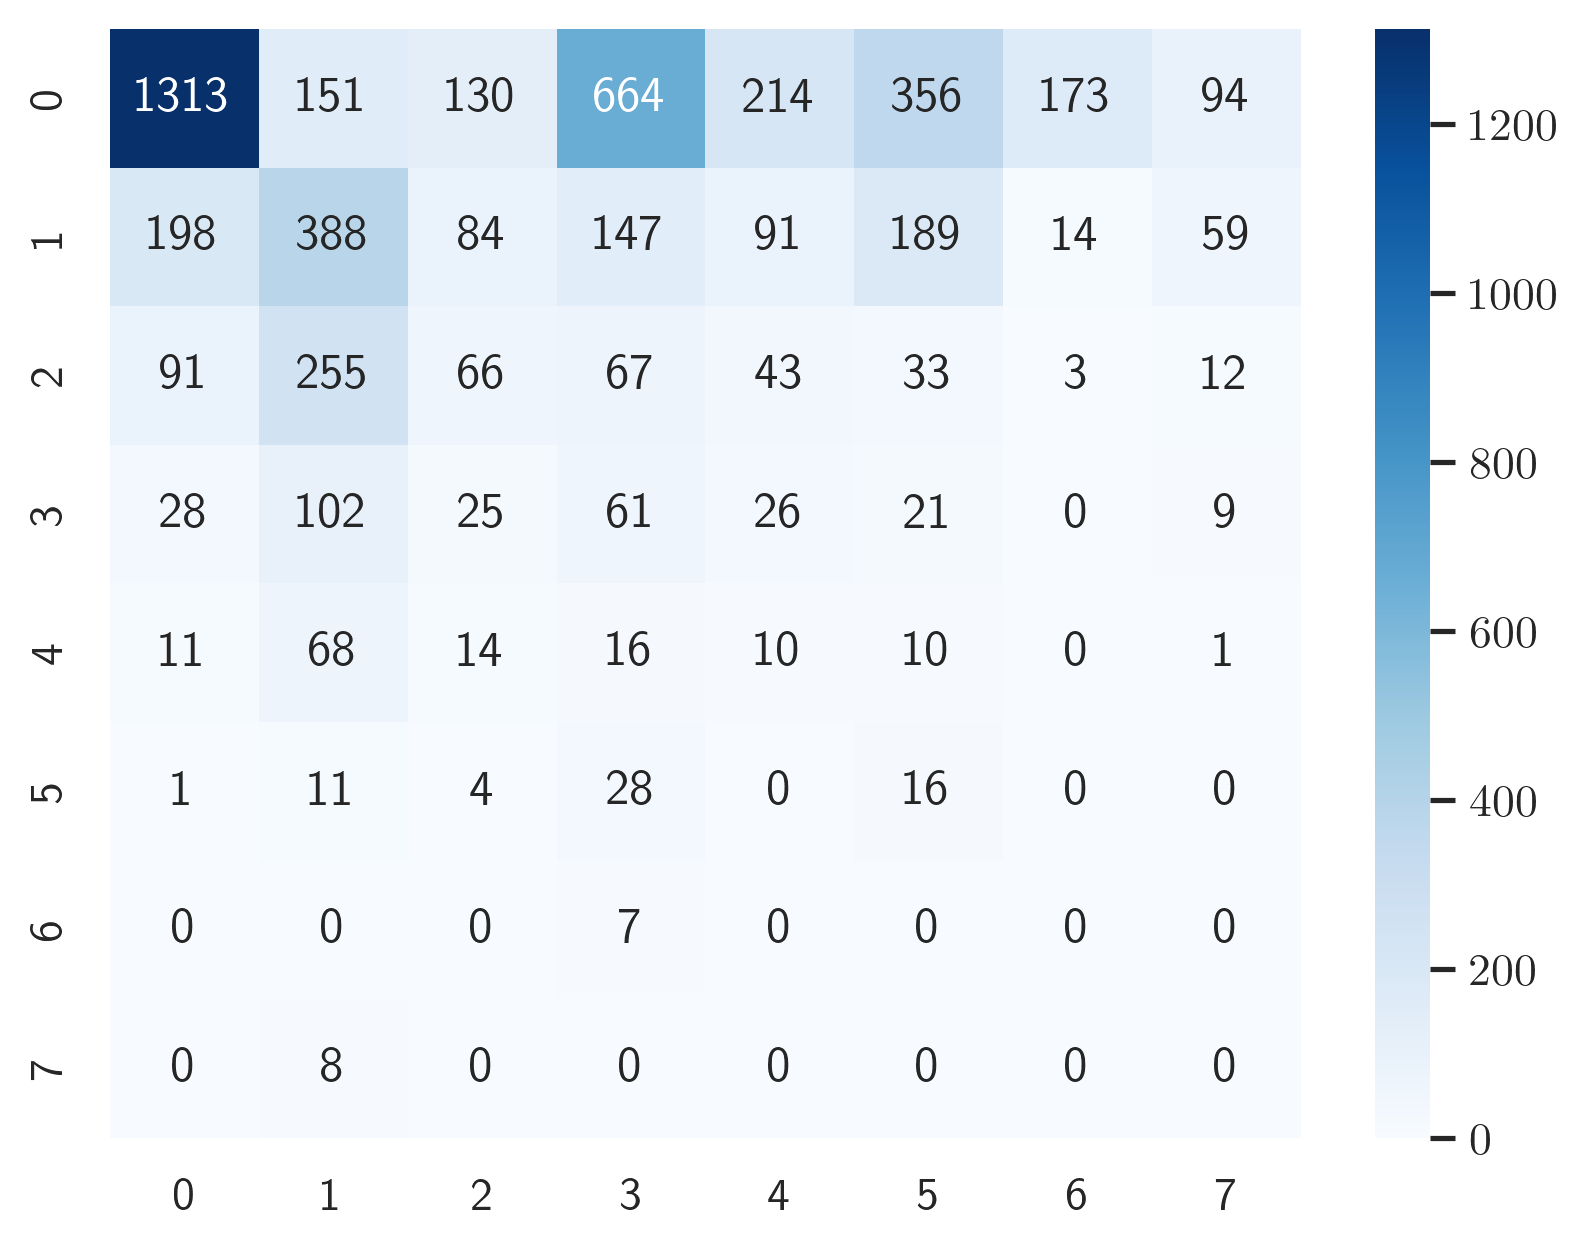

In [28]:
ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")

In [29]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [30]:
js #true order of the labels

[0, 7, 3, 2, 6, 5, 4, 1]

In [31]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

In [32]:
fixed.max()

8

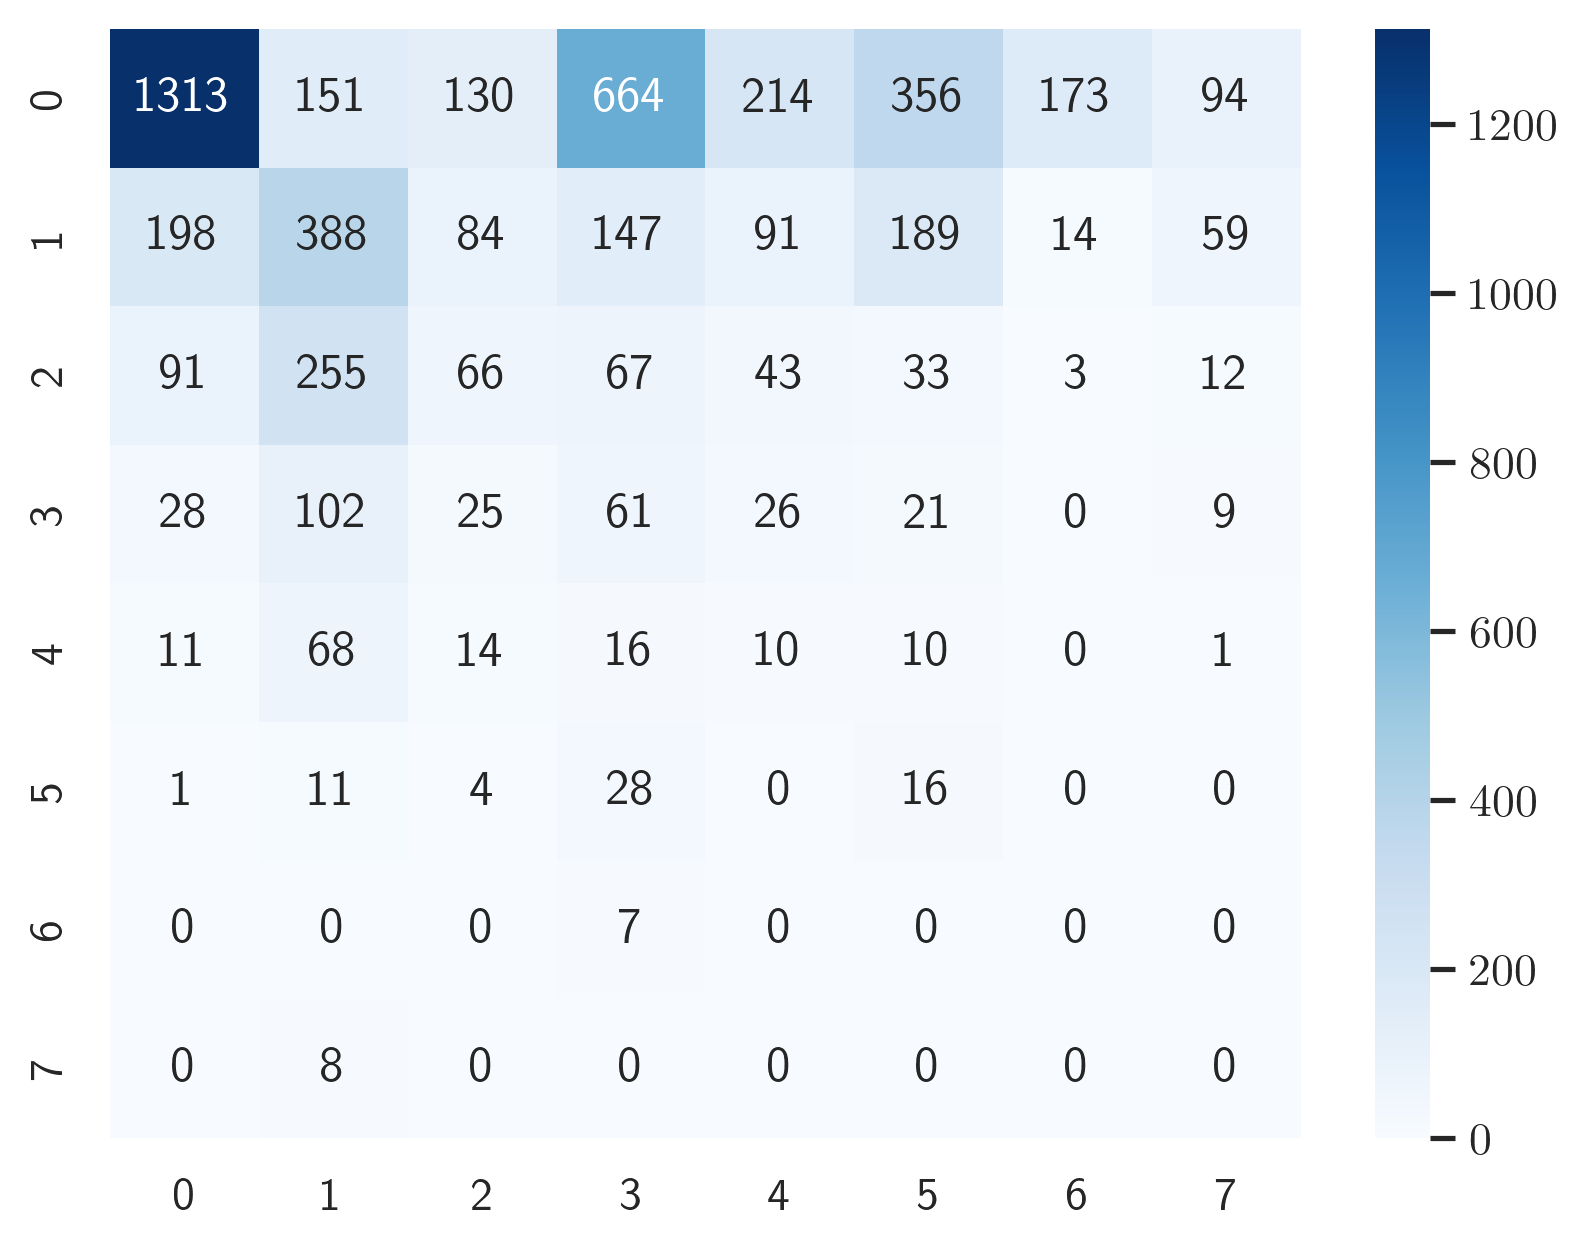

In [33]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [34]:
fixed

0       6
1       6
2       3
3       3
4       6
       ..
5307    3
5308    3
5309    3
5310    6
5311    6
Length: 5312, dtype: int32

In [35]:
acc

0.3490210843373494

In [36]:
np.trace(cm) / np.sum(cm)

0.3490210843373494

In [37]:
labels_list=labels_list+acc*fixed

In [38]:
labels_list

0       2.094127
1       2.094127
2       1.047063
3       1.047063
4       2.094127
          ...   
5307    1.047063
5308    1.047063
5309    1.047063
5310    2.094127
5311    2.094127
Length: 5312, dtype: float64

In [39]:
accuracy_list

[0.3490210843373494]

## DBSCAN -when there are more clusters than classes

In [40]:
random.seed(256)
# initialize the data set we'll work with
# define the model
dbscan_model = DBSCAN(min_samples=21)
#eps=0.25, min_samples=9
# train the model
dbscan_model.fit(data_normalized)

# assign each data point to a cluster
dbscan_result = dbscan_model.fit_predict(data_normalized)

# get all of the unique clusters
dbscan_cluster = np.unique(dbscan_result)

In [41]:
labels=dbscan_model.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [42]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

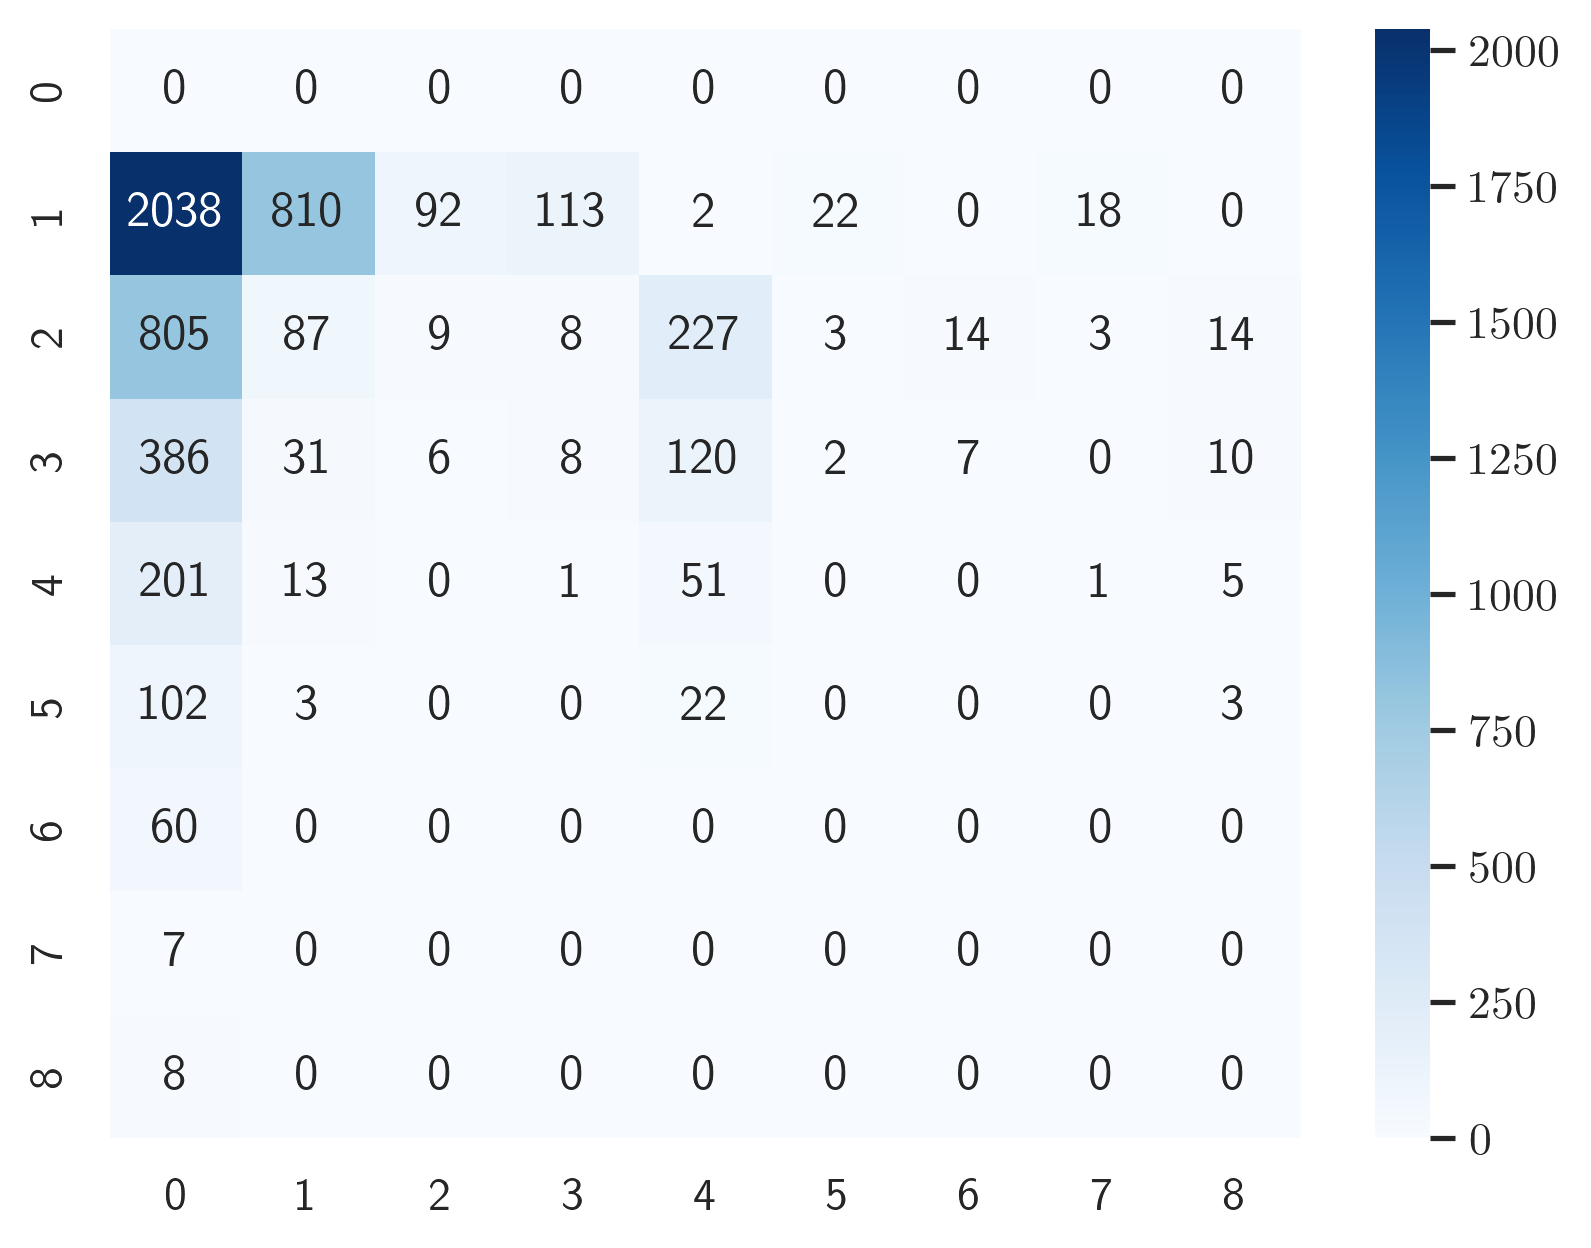

In [43]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [44]:
np.unique(dbscan_model.labels_+1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [45]:
max(dbscan_model.labels_) #should be 7 for all

7

In [46]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


In [47]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

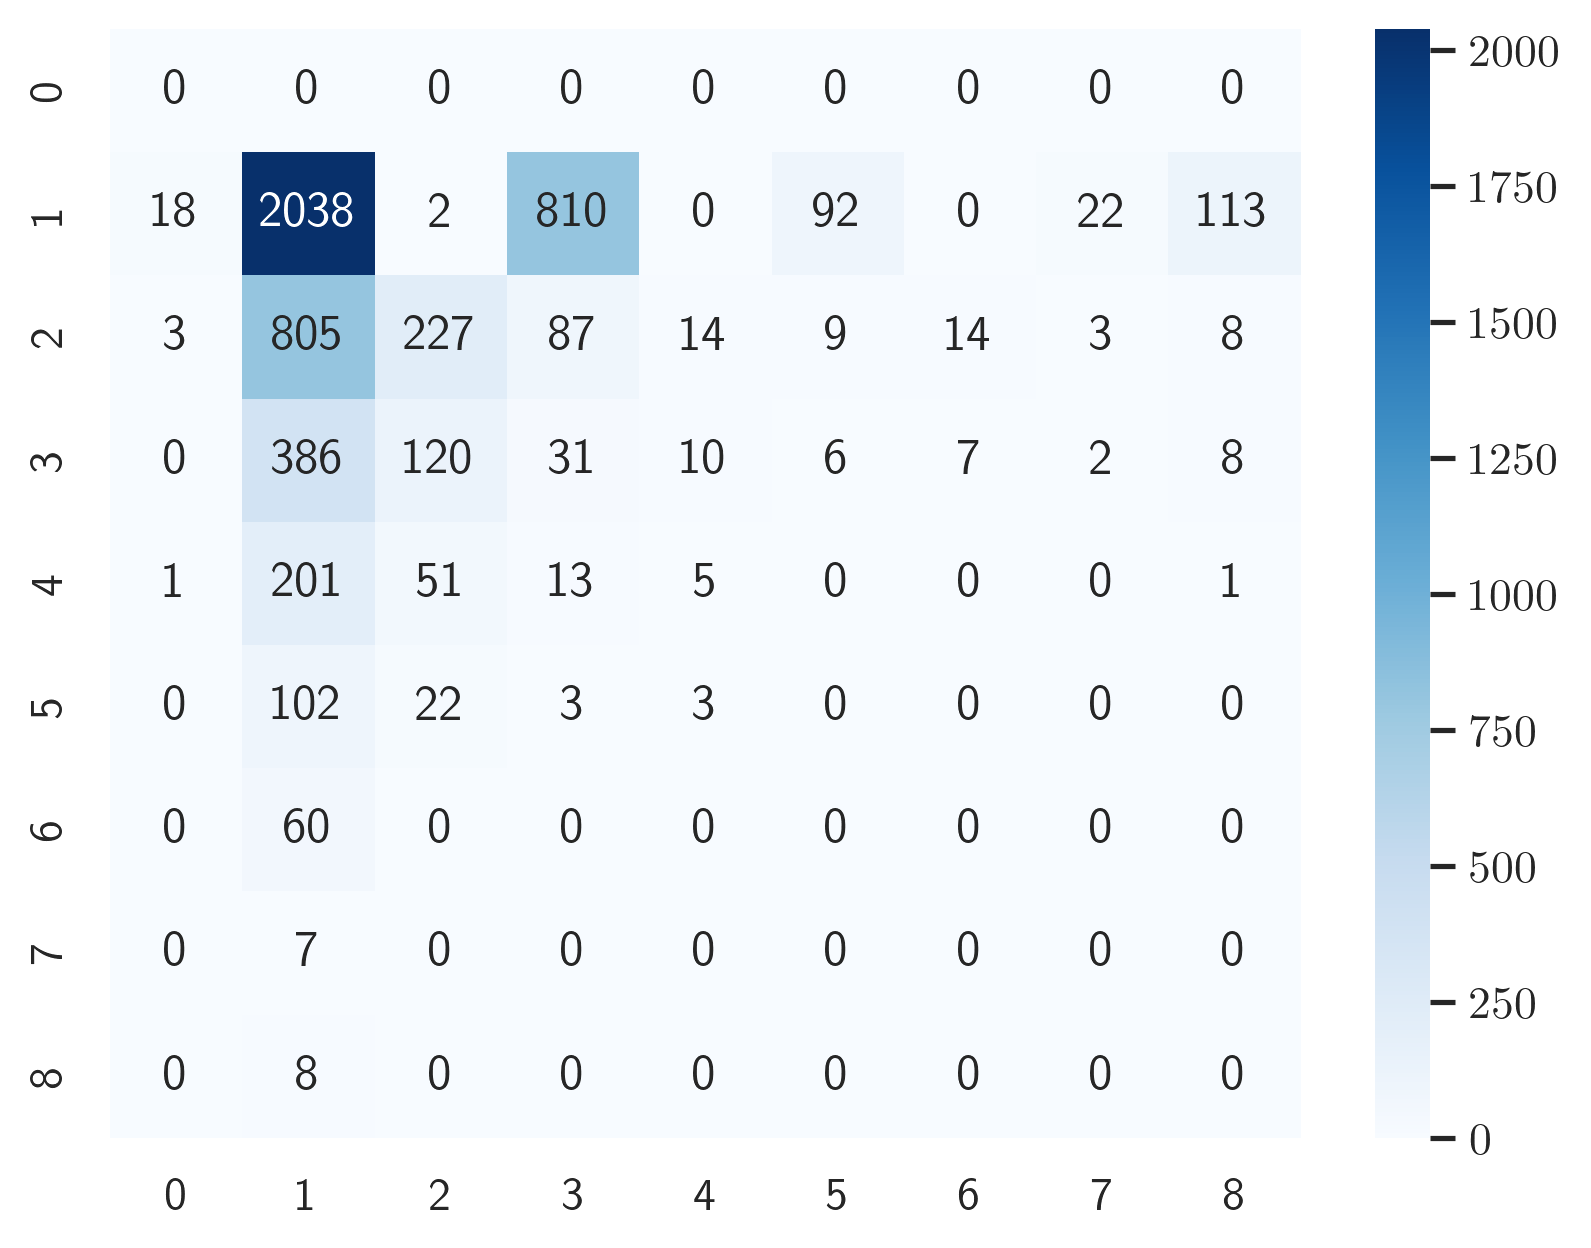

In [48]:
ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")

In [49]:
accuracy_list.append(acc)

In [50]:
js=np.delete(js,0)

In [51]:
js

array([0, 4, 1, 8, 2, 6, 5, 3])

In [52]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]

In [53]:
reordered

array([-1.,  3.,  0.,  7.,  1.,  5.,  4.,  2.])

In [54]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [55]:
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

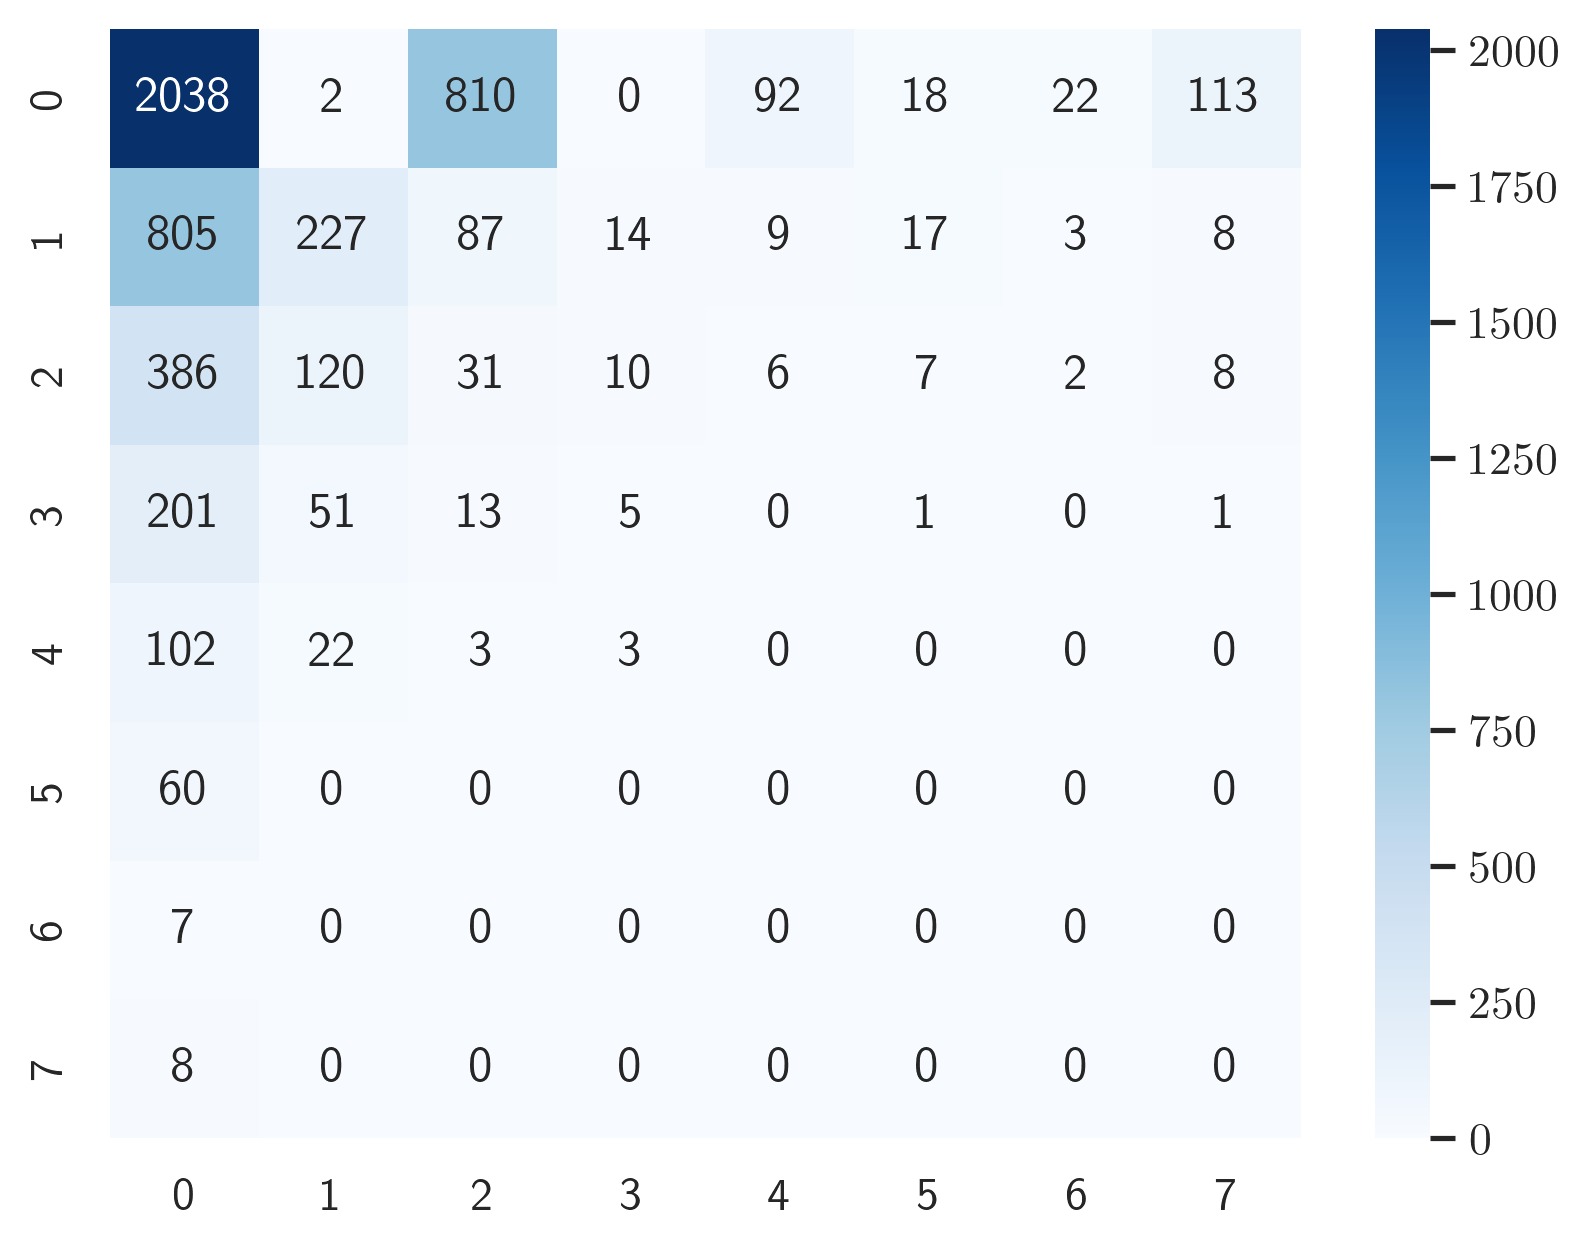

In [56]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [57]:
np.unique(fixed)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [58]:
labels_list=labels_list+acc*fixed

In [59]:
accuracy_list

[0.3490210843373494, 0.43317018072289154]

In [60]:
labels_list

0       2.527297
1       2.527297
2       1.480233
3       1.480233
4       2.527297
          ...   
5307    1.480233
5308    1.480233
5309    1.480233
5310    2.527297
5311    2.527297
Length: 5312, dtype: float64

## Gaussian Mixture

In [61]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8)
gmm.fit(data_normalized)

#predictions from gmm
labels = gmm.predict(data_normalized)

In [62]:
labels

array([5, 5, 1, ..., 1, 5, 5])

In [63]:
max(labels) 

7

In [64]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

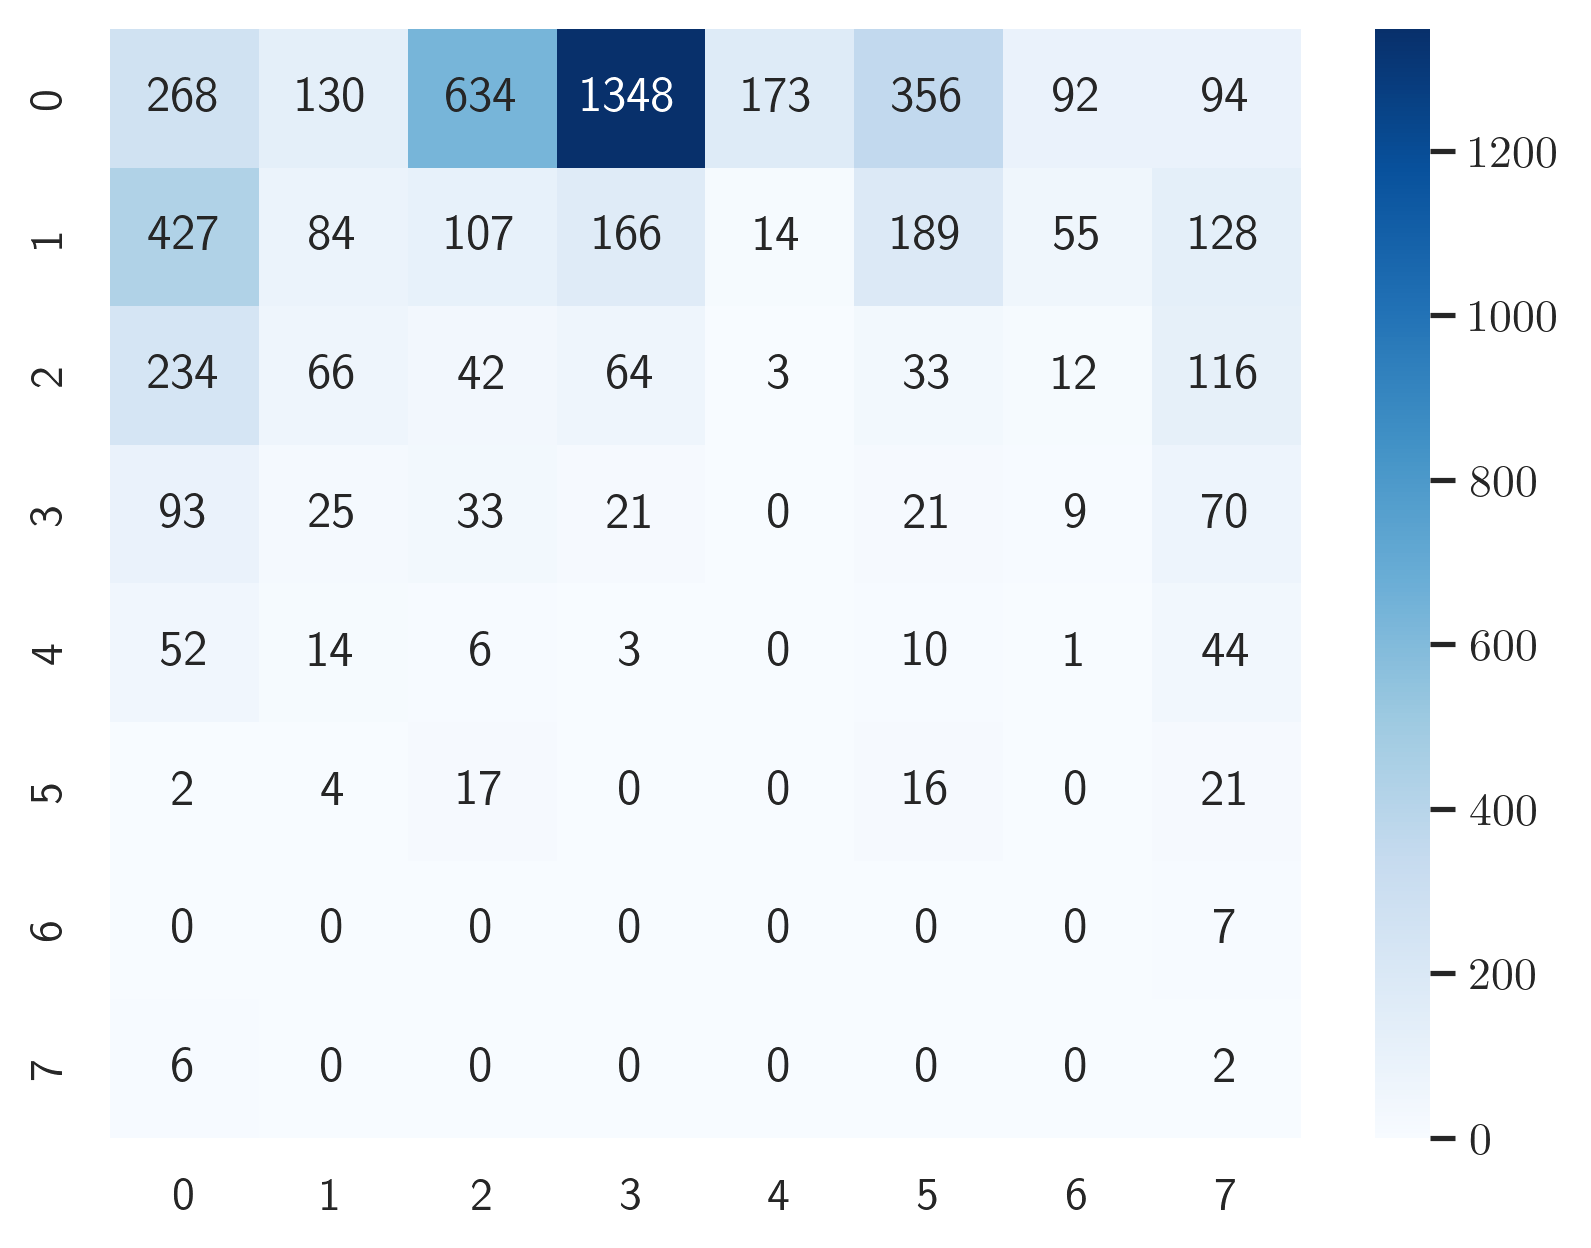

In [65]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [66]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


In [67]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

In [68]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [69]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

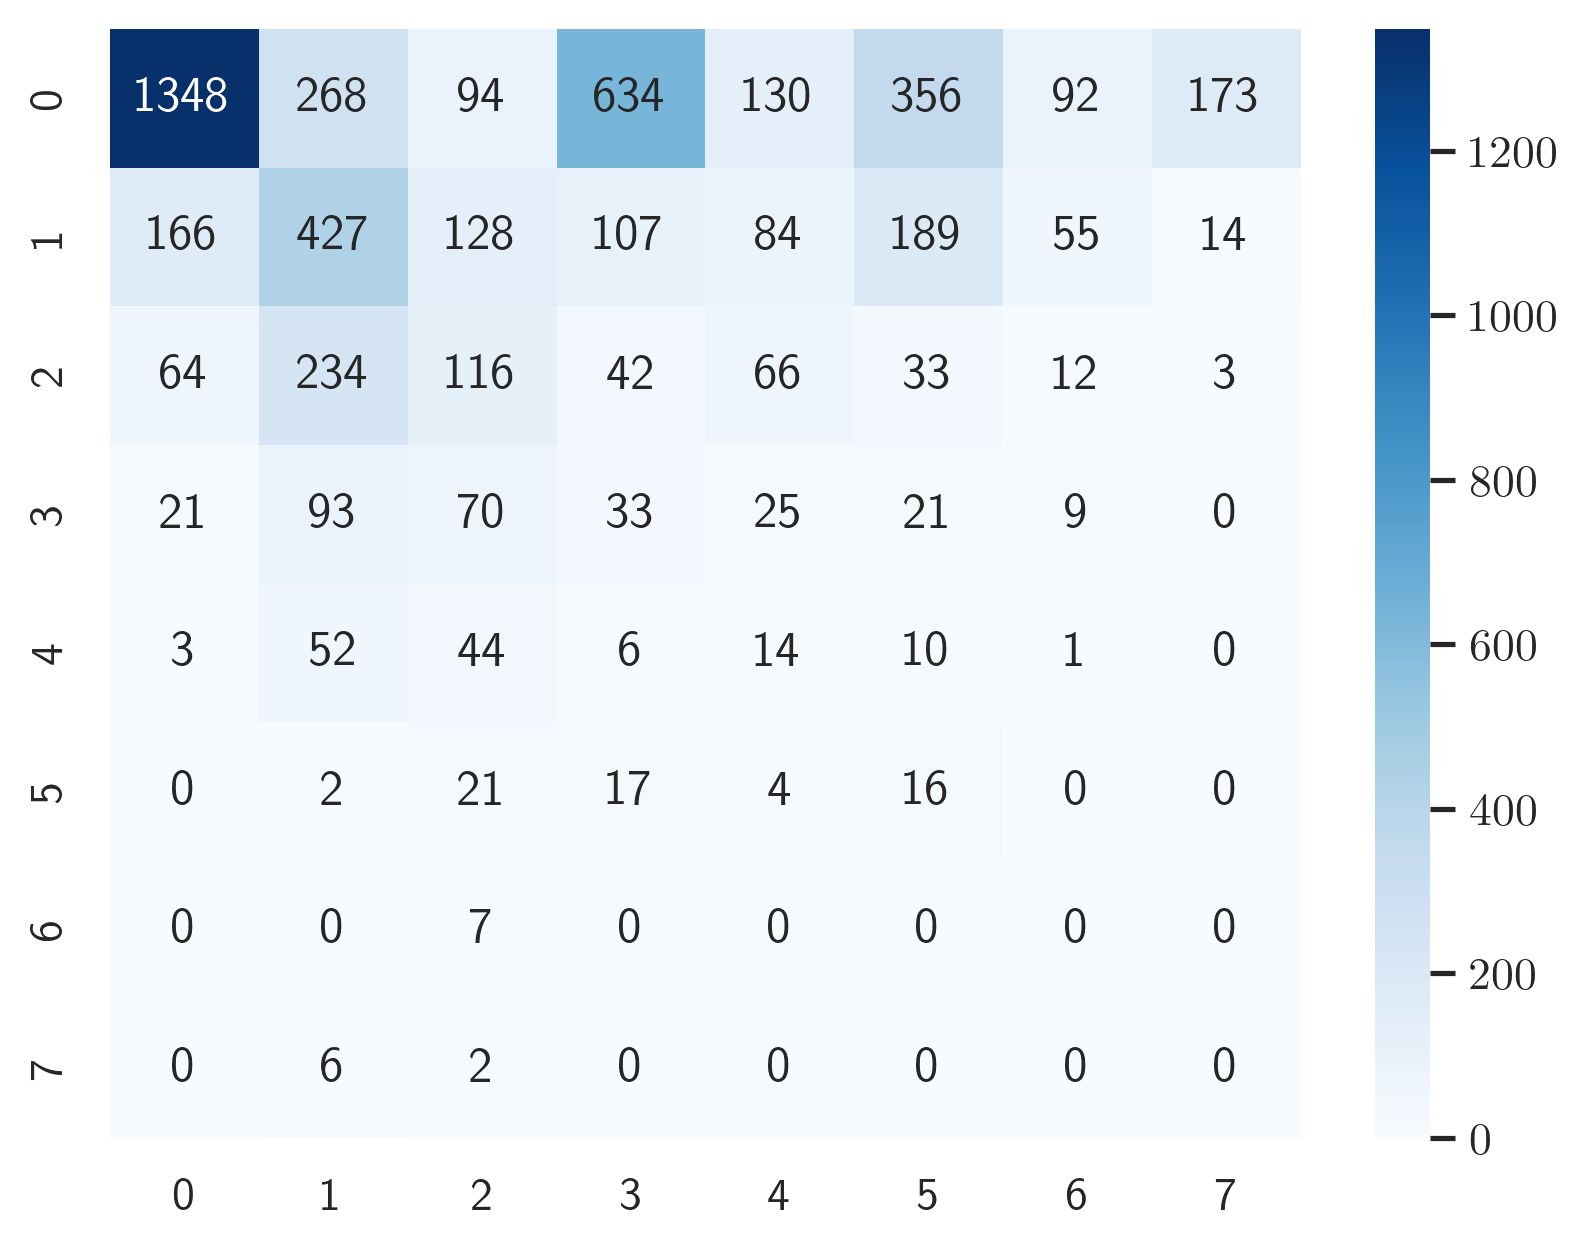

In [70]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [71]:
labels_list=labels_list+acc*fixed

In [72]:
accuracy_list

[0.3490210843373494, 0.43317018072289154, 0.3678463855421687]

In [73]:
labels_list

0       4.734375
1       4.734375
2       3.319465
3       3.319465
4       4.734375
          ...   
5307    3.319465
5308    3.319465
5309    3.319465
5310    4.734375
5311    4.734375
Length: 5312, dtype: float64

## BIRCH

In [74]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=8, threshold=1.5)
brc.fit(data_normalized)

labels = brc.predict(data_normalized)

In [75]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [76]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


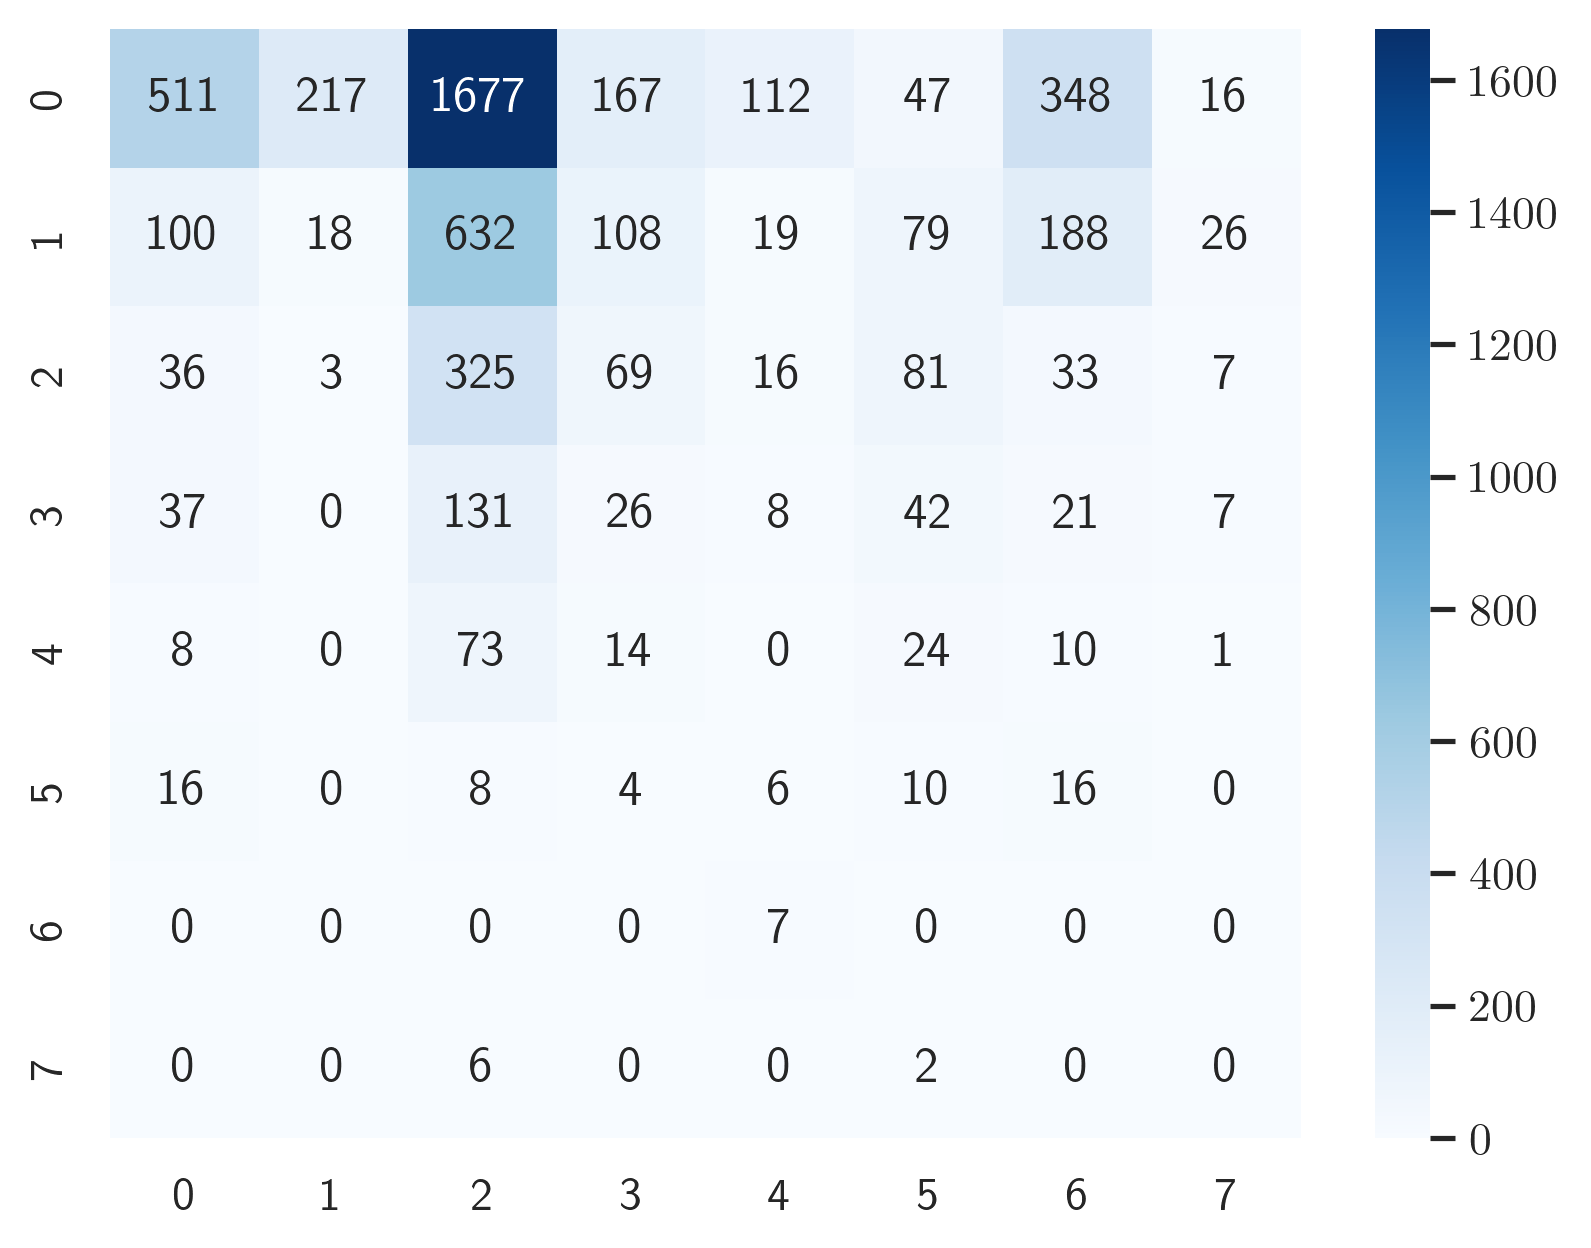

In [77]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [78]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

In [79]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

In [80]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

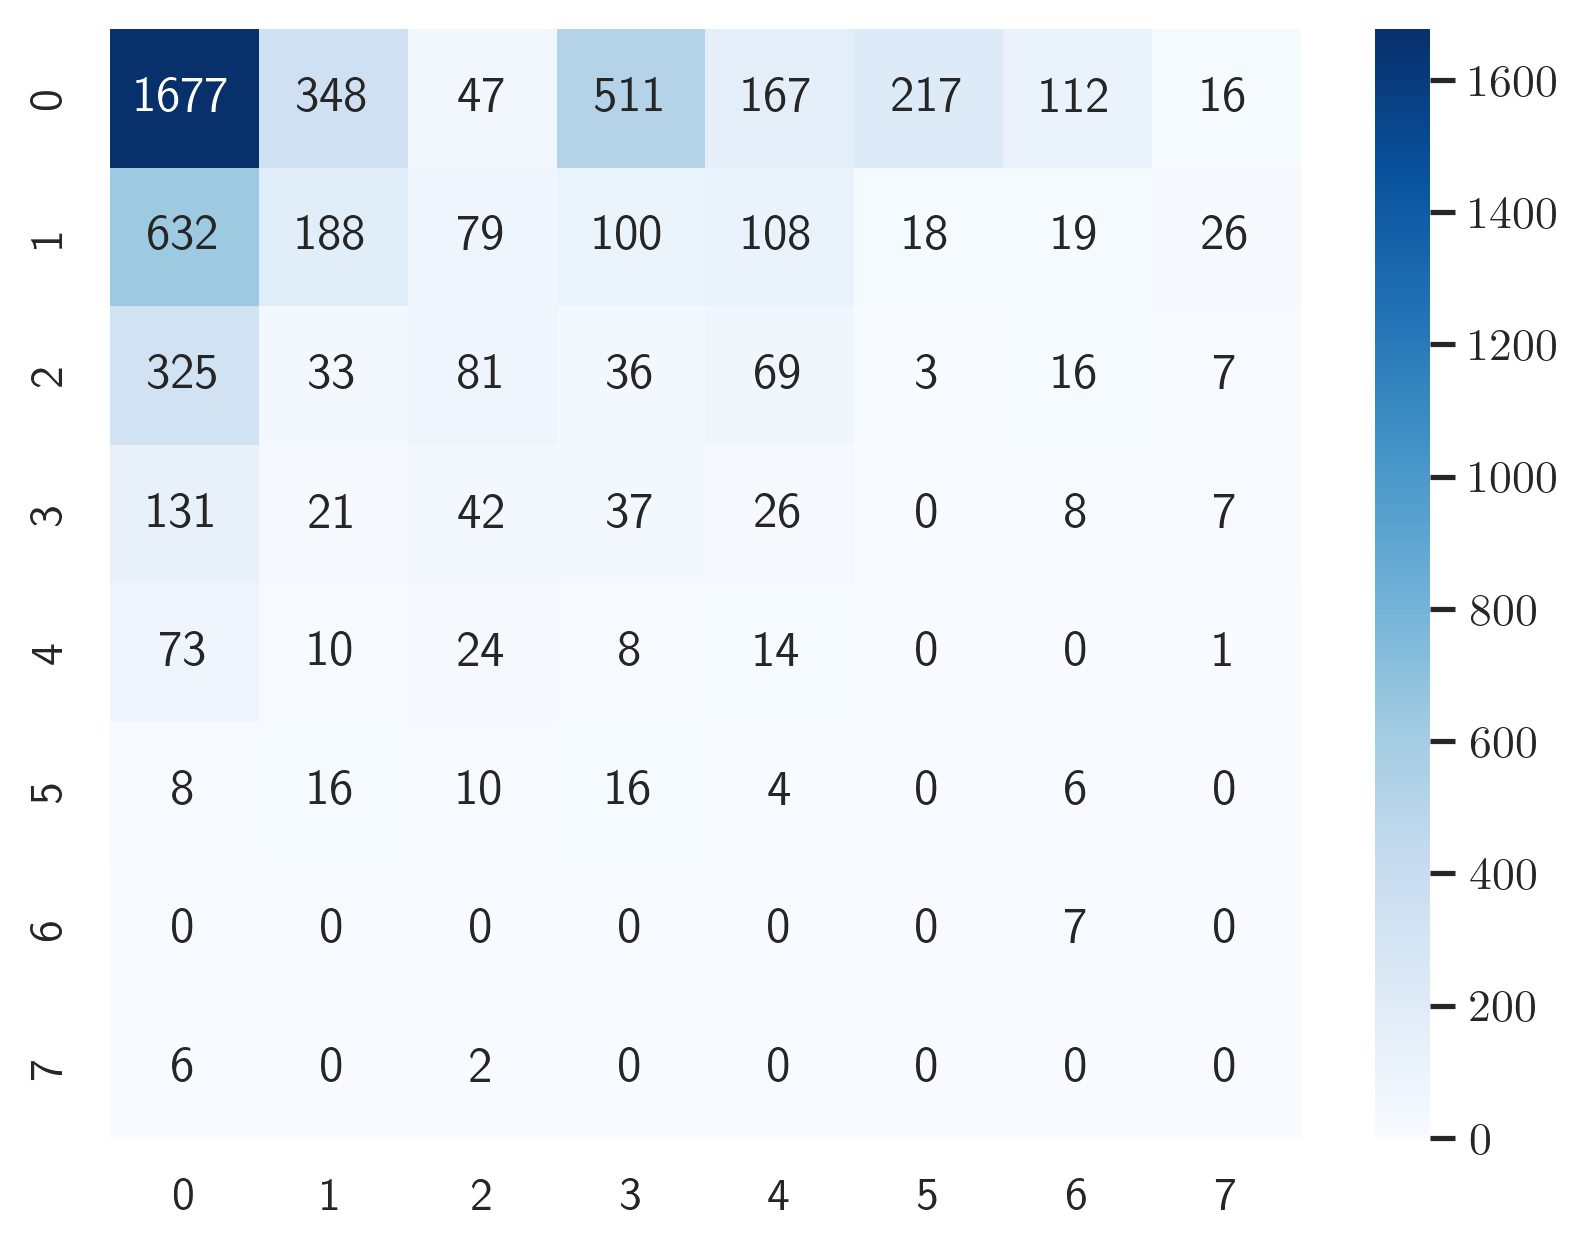

In [81]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [82]:
labels_list=labels_list+acc*fixed

In [83]:
accuracy_list

[0.3490210843373494,
 0.43317018072289154,
 0.3678463855421687,
 0.3772590361445783]

In [84]:
labels_list

0       5.488893
1       5.488893
2       5.205761
3       5.205761
4       5.488893
          ...   
5307    5.205761
5308    5.205761
5309    5.205761
5310    5.488893
5311    5.488893
Length: 5312, dtype: float64

## OPTICS

In [85]:
from sklearn.cluster import OPTICS
optics_clustering = OPTICS(min_cluster_size=0.02).fit(data_normalized)
labels = optics_clustering.labels_

In [86]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [87]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"],labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


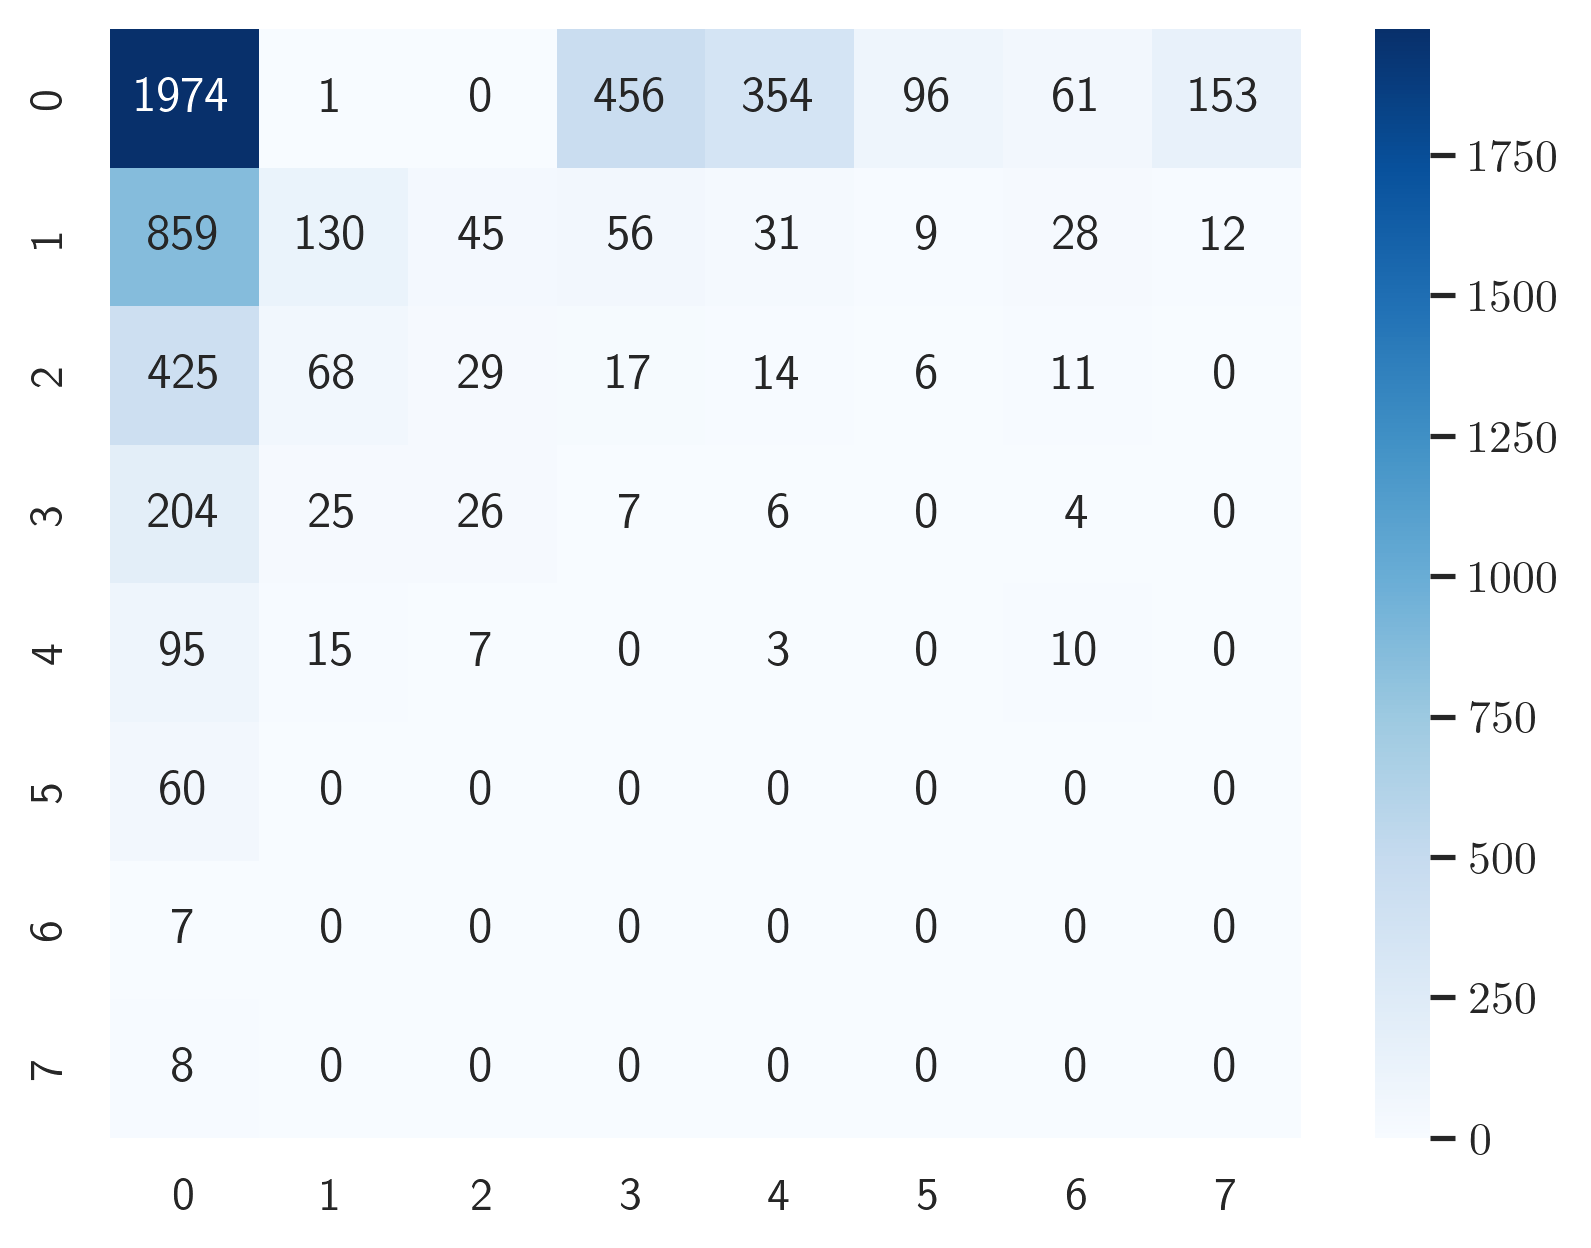

In [88]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+2)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [89]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


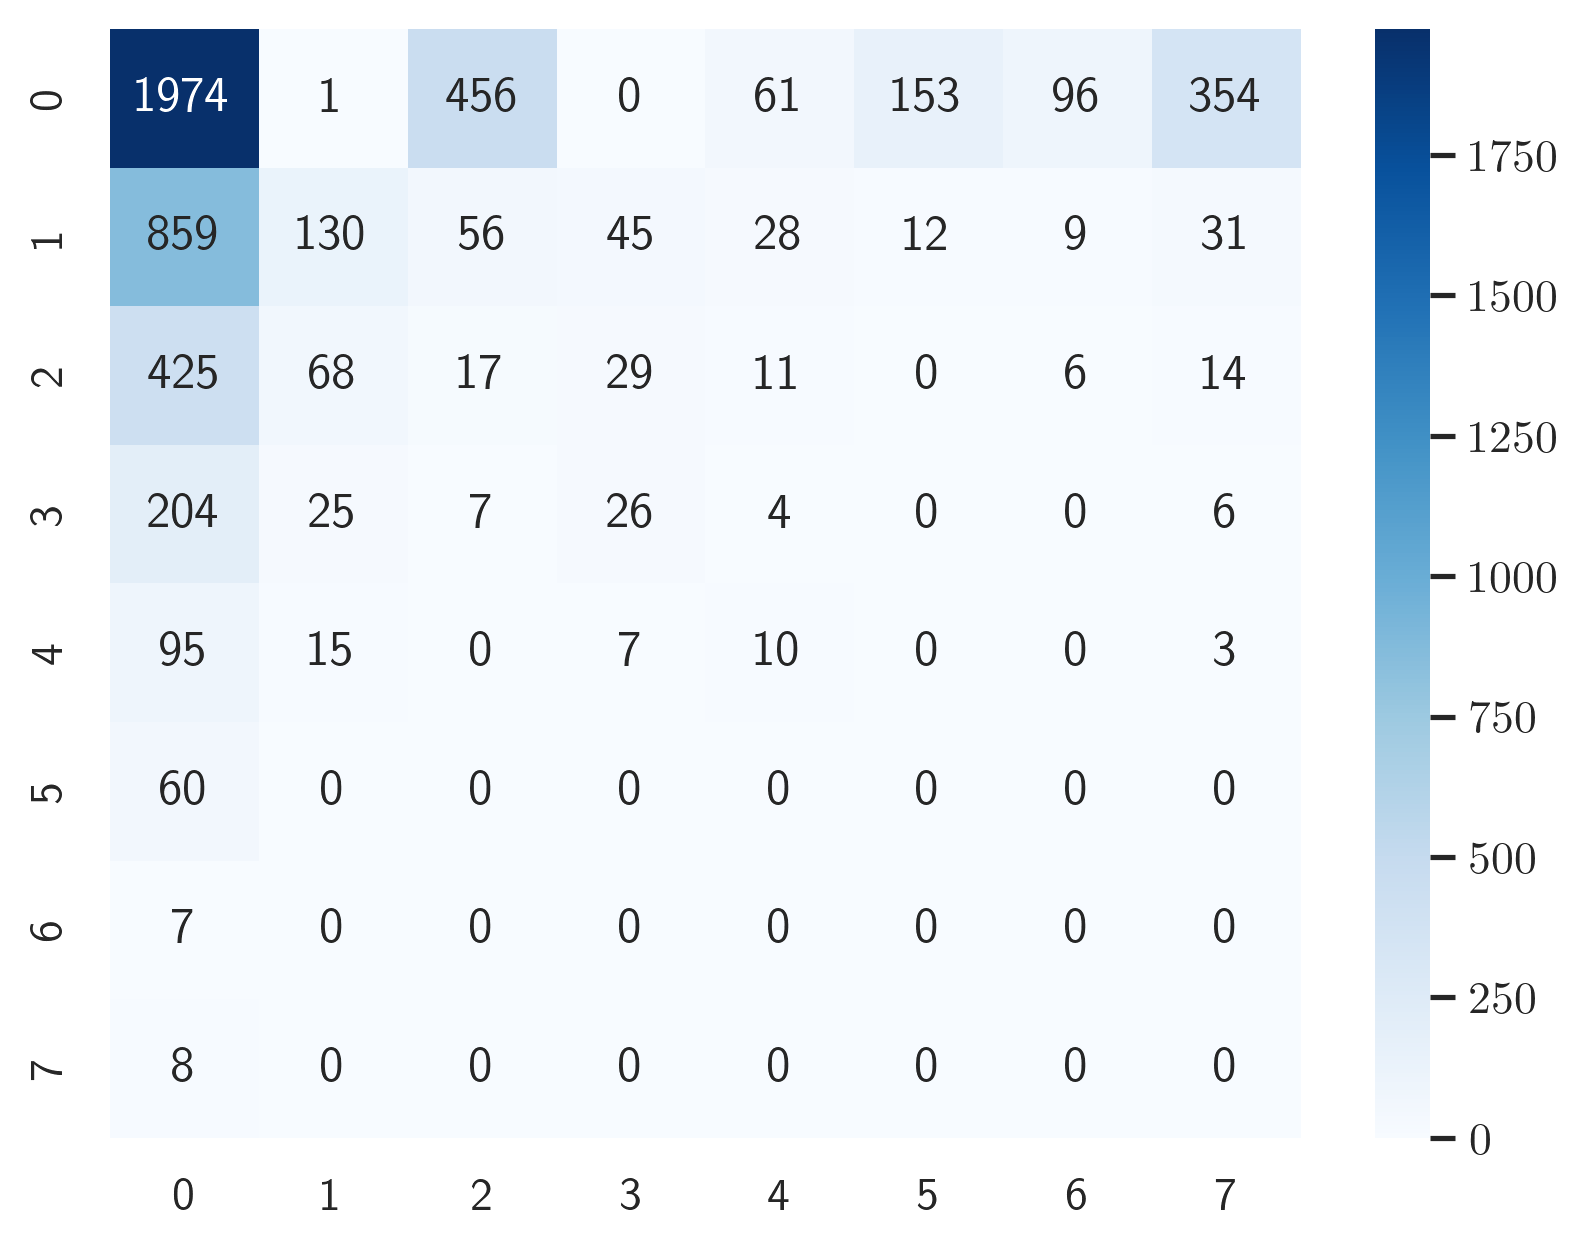

In [90]:
ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")

In [91]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [92]:
js

[0, 1, 3, 2, 6, 7, 5, 4]

In [93]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

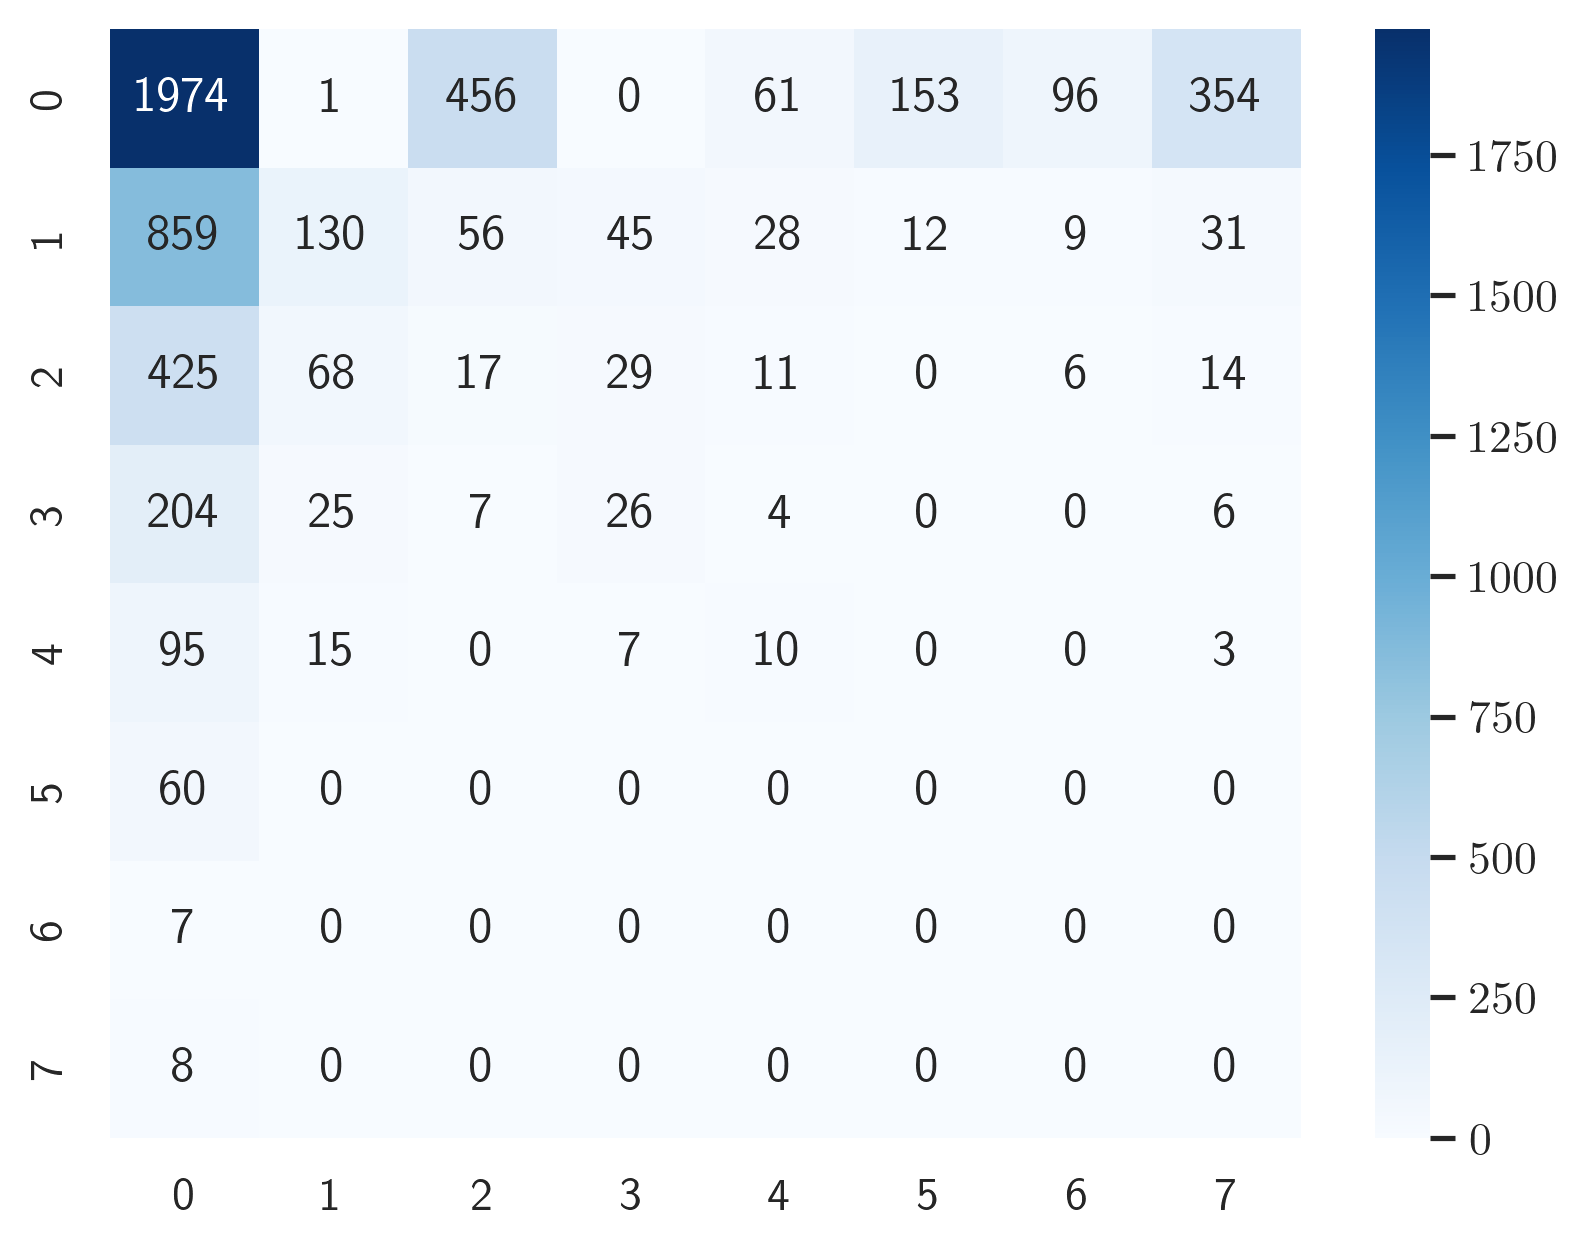

In [94]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [95]:
labels_list=labels_list+acc*fixed

In [96]:
labels_list

0       5.894955
1       5.894955
2       5.611822
3       5.611822
4       5.894955
          ...   
5307    5.611822
5308    5.611822
5309    5.611822
5310    5.894955
5311    5.894955
Length: 5312, dtype: float64

## Affinity Propagation

In [97]:
from sklearn.cluster import AffinityPropagation

In [98]:
affinity_model=AffinityPropagation(preference=-1200.8, damping=0.9)
clustering =affinity_model.fit(data_normalized)
labels=clustering.labels_
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

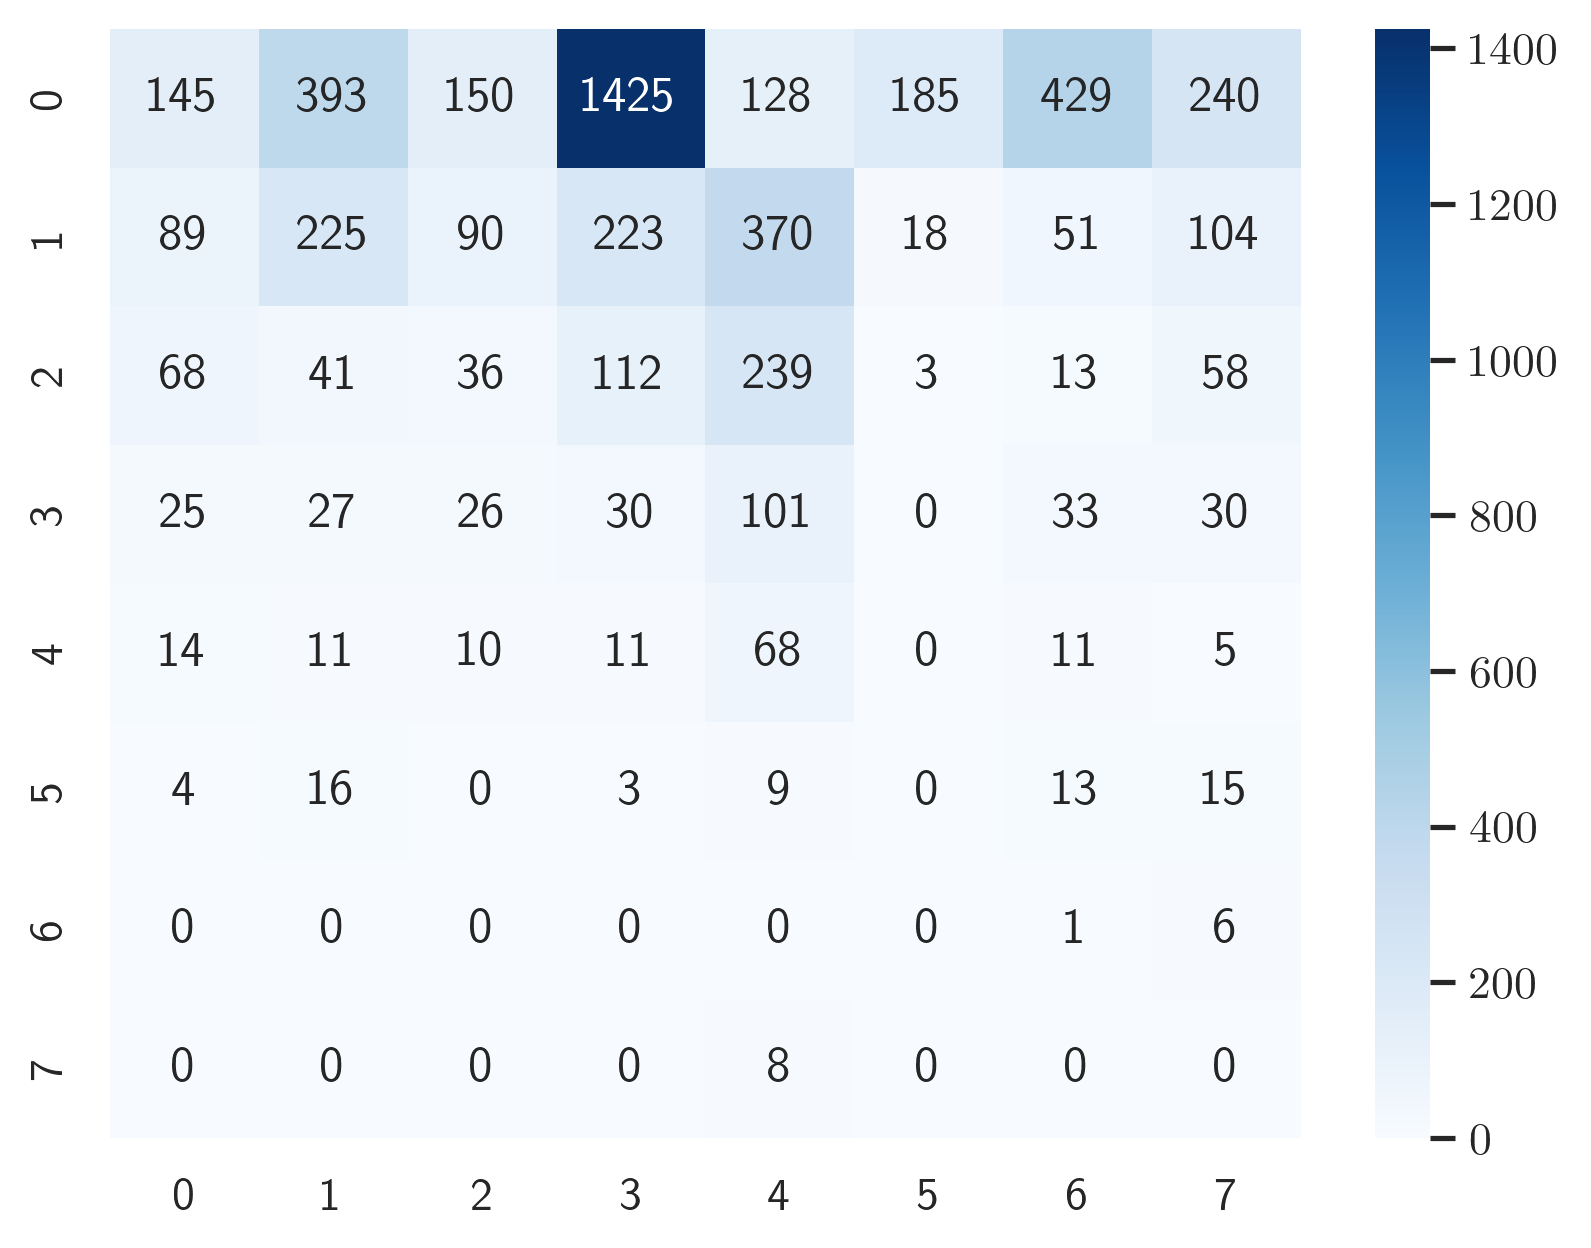

In [99]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [100]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


In [101]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

In [102]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

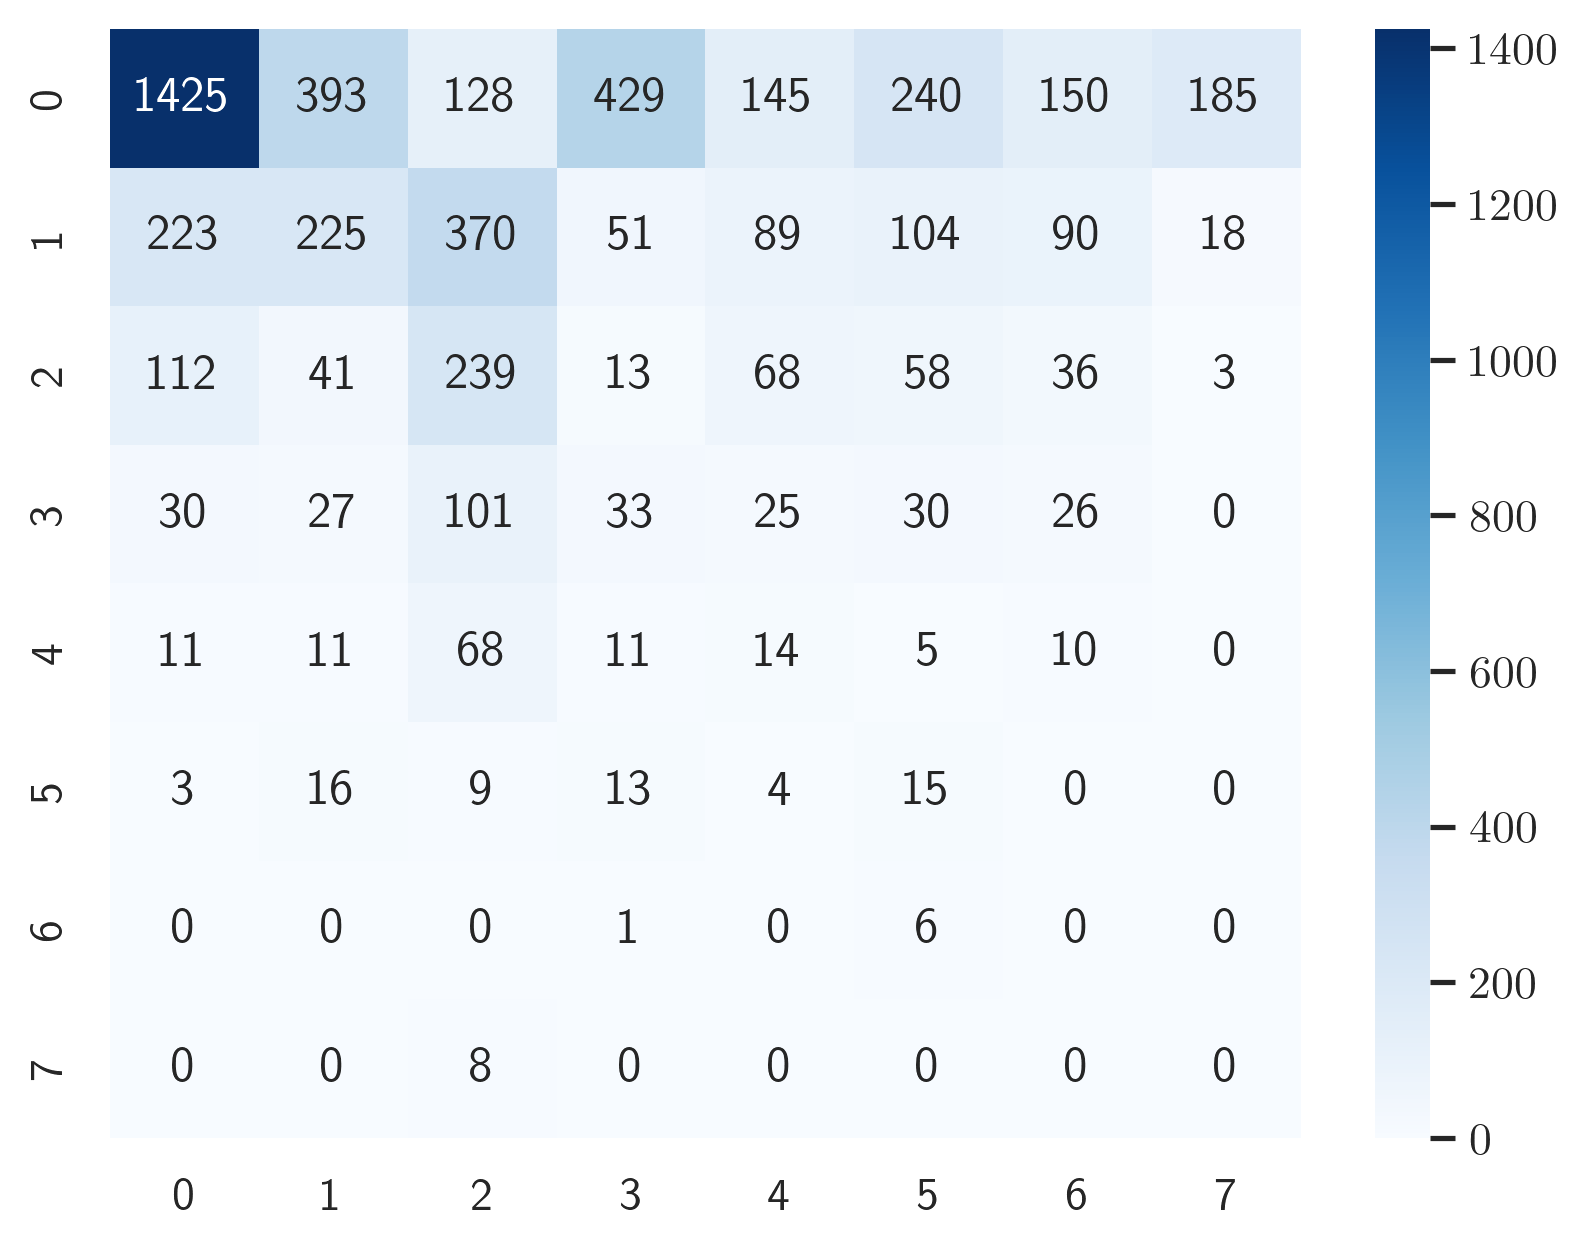

In [103]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [104]:
labels_list=labels_list+acc*fixed

In [105]:
accuracy_list

[0.3490210843373494,
 0.43317018072289154,
 0.3678463855421687,
 0.3772590361445783,
 0.40606174698795183,
 0.3672816265060241]

In [106]:
labels_list

0       6.629518
1       6.629518
2       7.448230
3       7.448230
4       6.629518
          ...   
5307    7.448230
5308    7.448230
5309    7.448230
5310    6.629518
5311    6.629518
Length: 5312, dtype: float64

## Mean-shift clustering

In [107]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=3.5)
ms.fit(data_normalized)
labels = ms.labels_

In [108]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [109]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"],labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


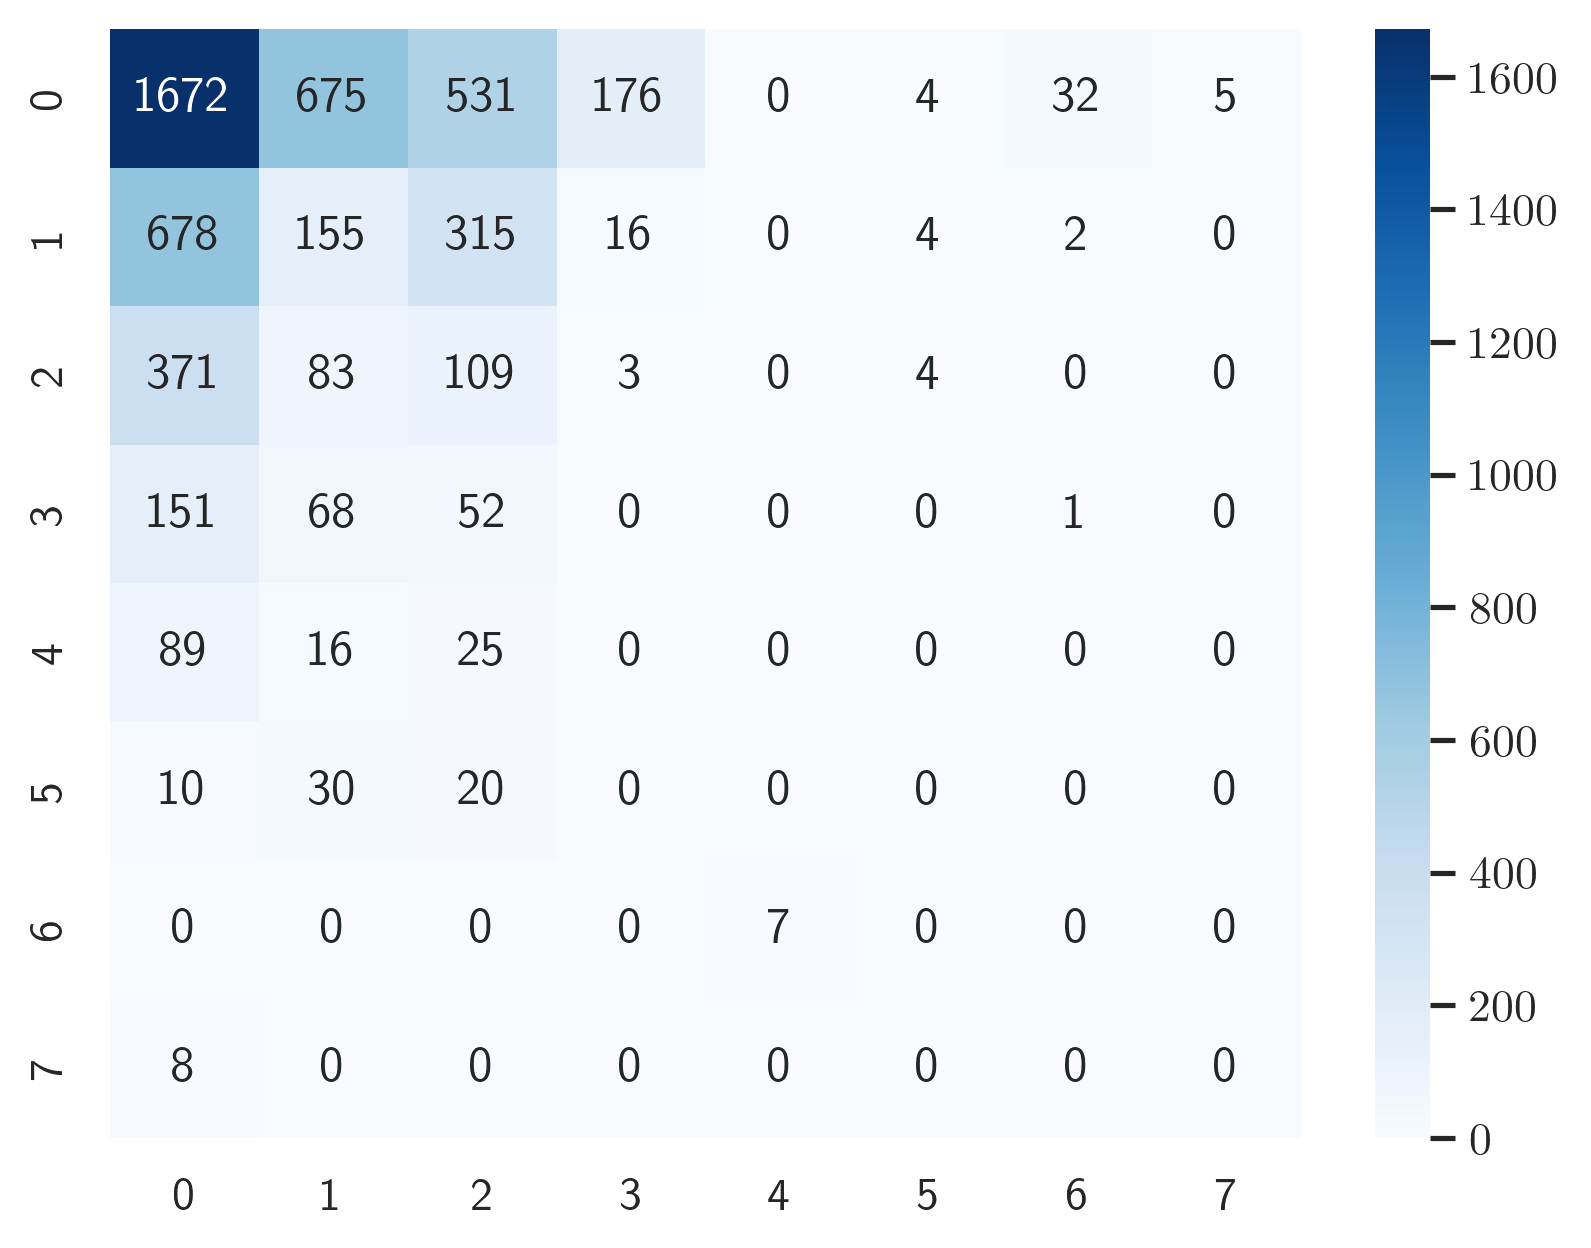

In [110]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [111]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


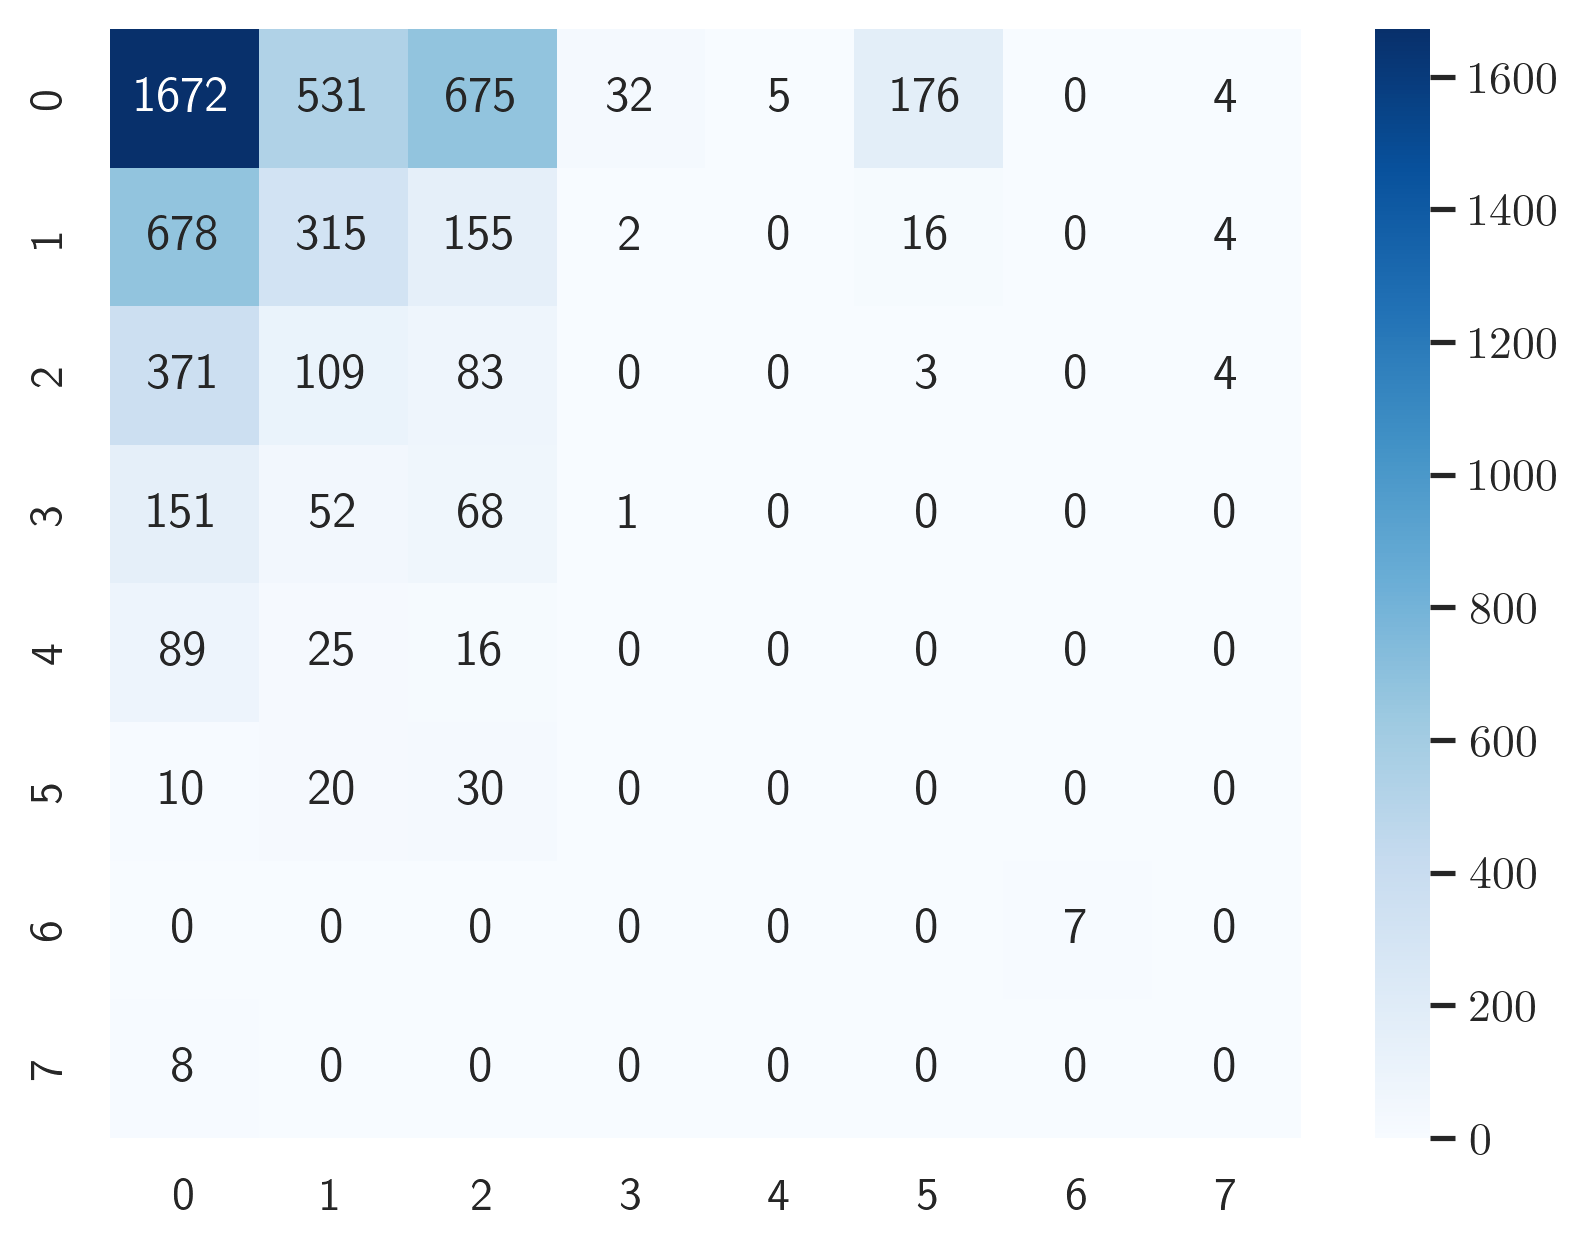

In [112]:
ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")

In [113]:
js

[0, 2, 1, 6, 7, 3, 4, 5]

In [114]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

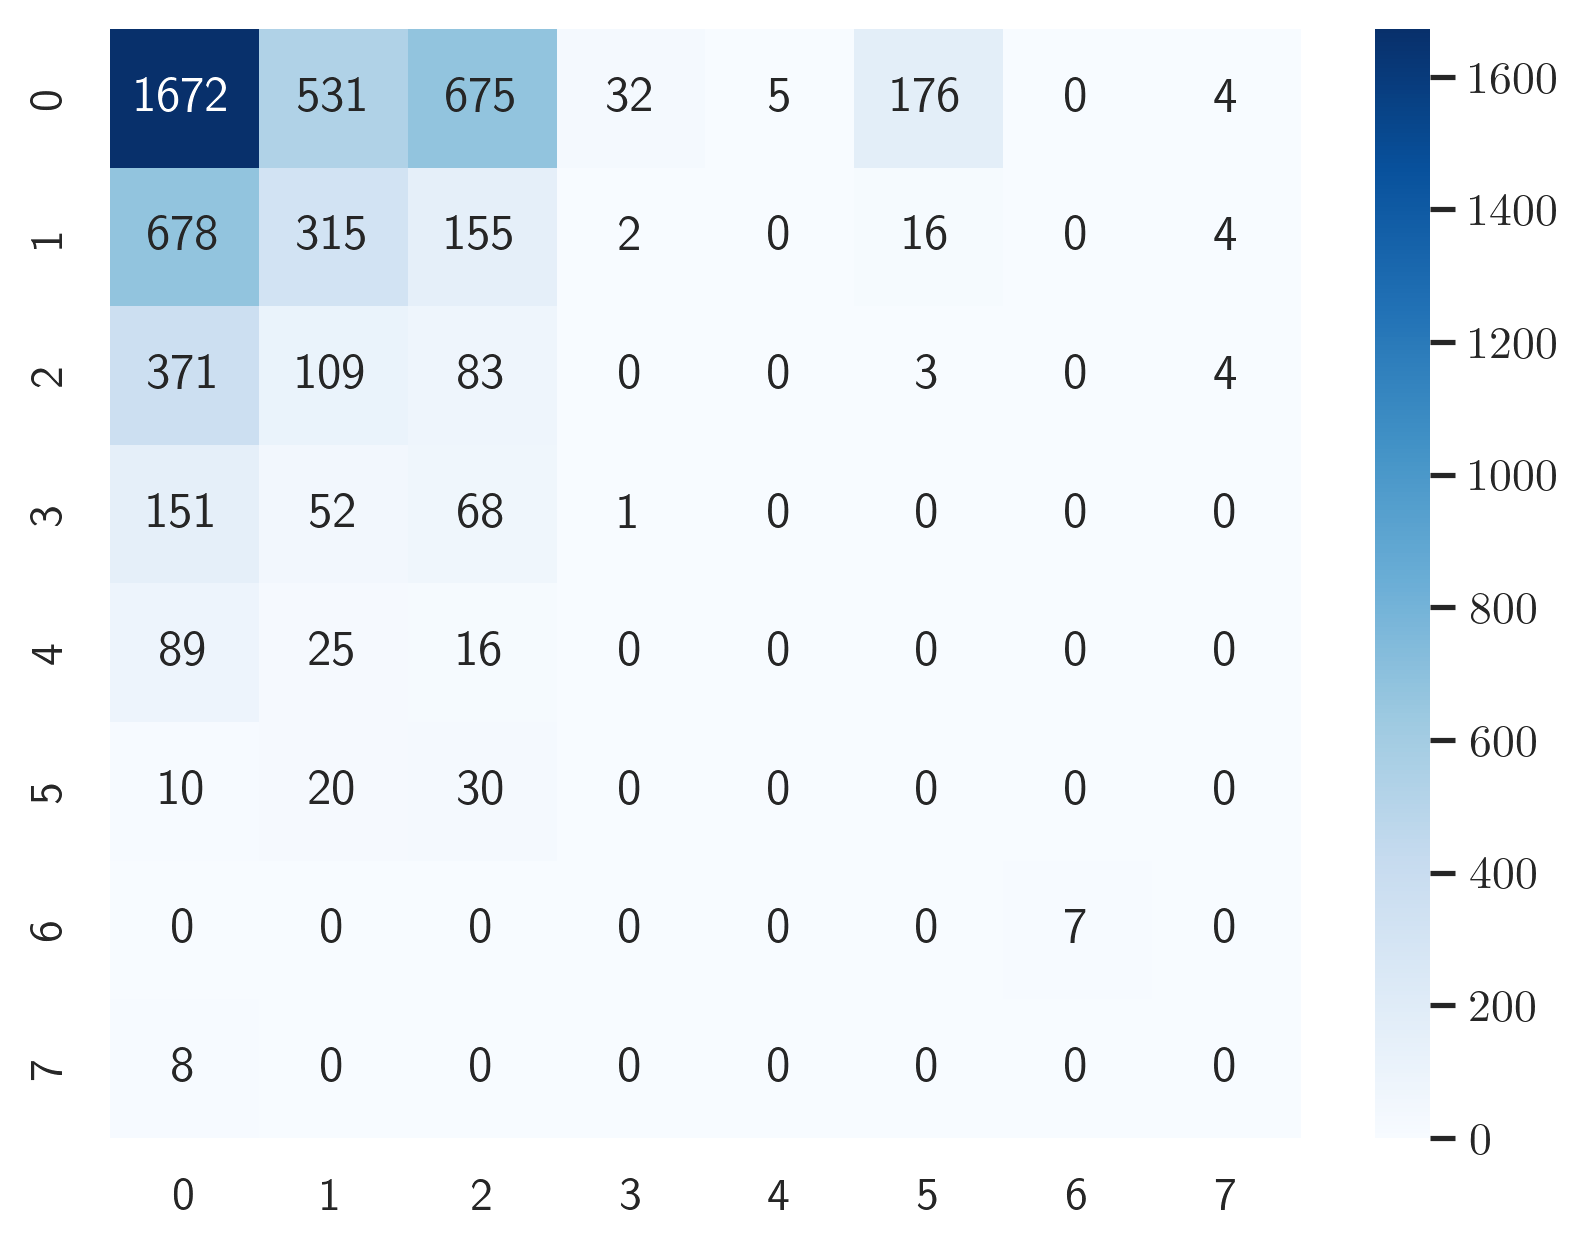

In [115]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [116]:
labels_list=labels_list+acc*fixed

In [117]:
labels_list

0       7.411898
1       7.411898
2       8.230610
3       8.230610
4       7.411898
          ...   
5307    8.230610
5308    8.230610
5309    8.230610
5310    7.411898
5311    7.411898
Length: 5312, dtype: float64

In [118]:
accuracy_list

[0.3490210843373494,
 0.43317018072289154,
 0.3678463855421687,
 0.3772590361445783,
 0.40606174698795183,
 0.3672816265060241,
 0.39118975903614456]

## Agglomerative Clustering

In [119]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
model.fit(data_normalized)
labels = model.labels_

In [120]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [121]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


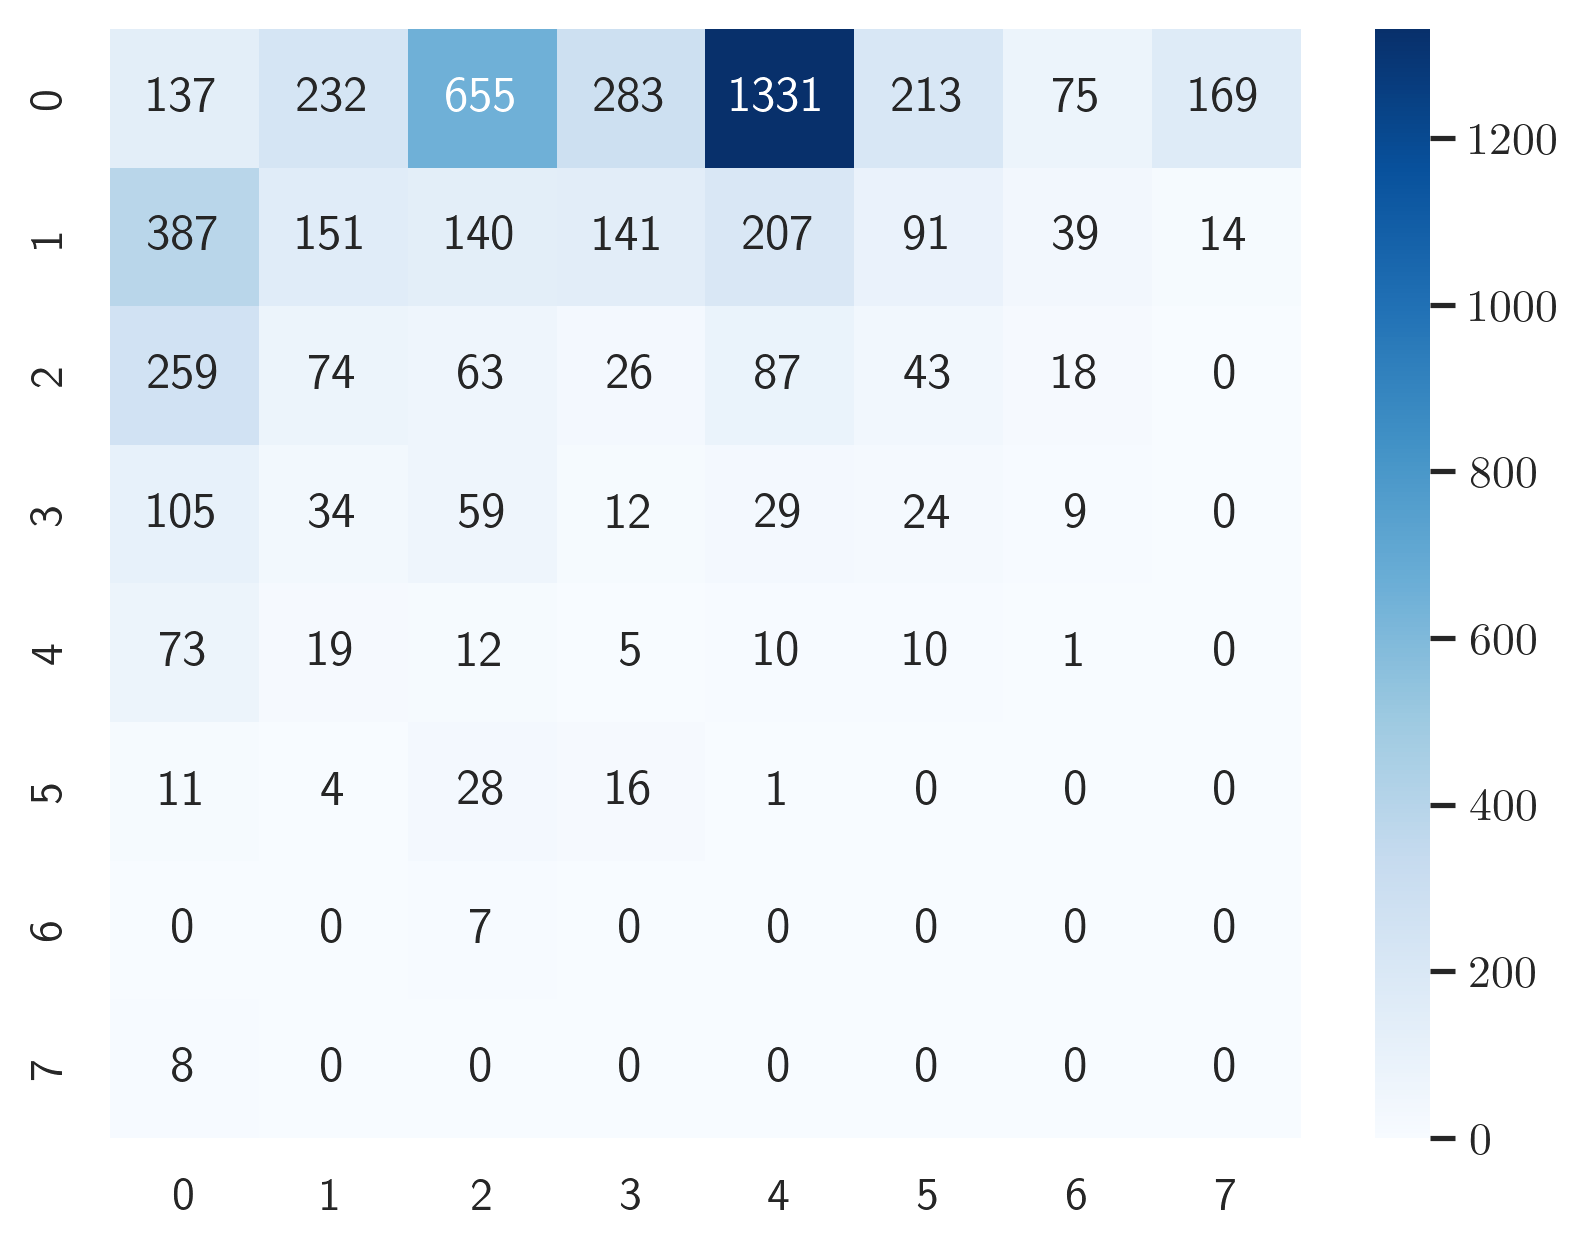

In [122]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [123]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


In [124]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

In [125]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

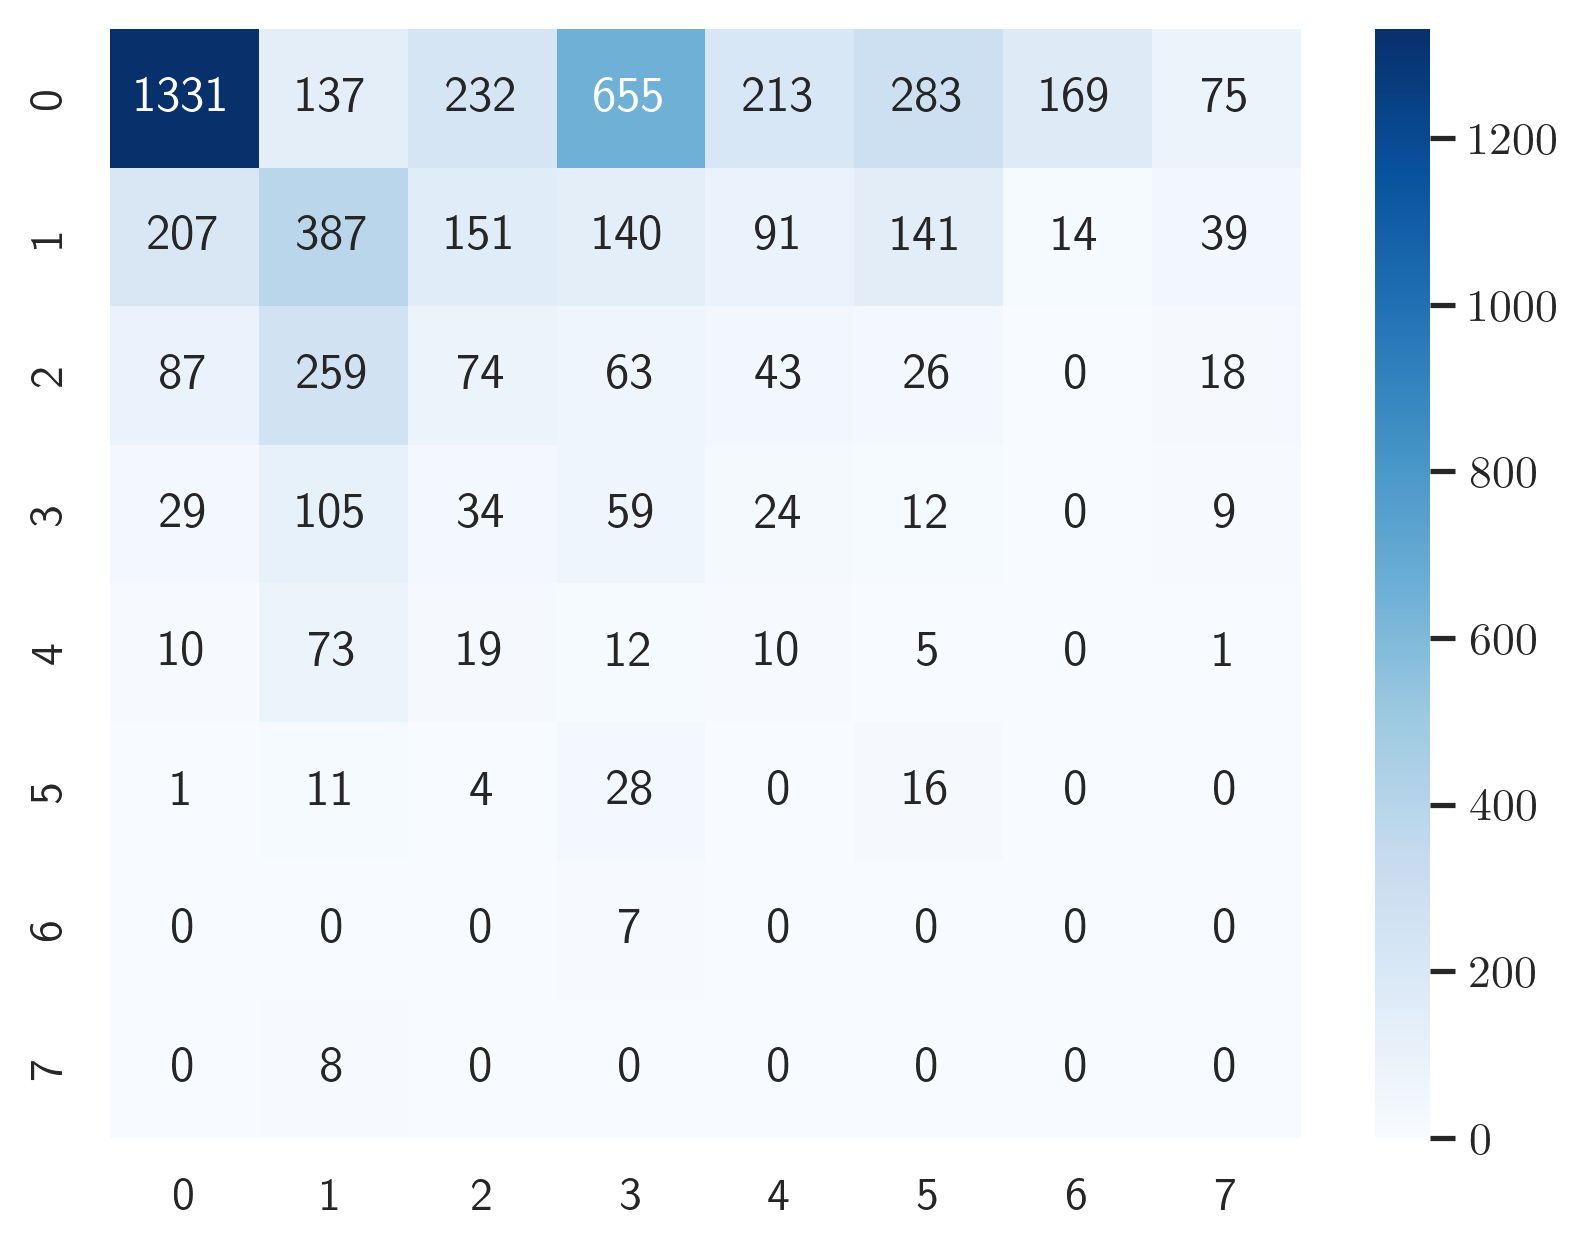

In [126]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [127]:
labels_list=labels_list+acc*fixed

In [128]:
accuracy_list

[0.3490210843373494,
 0.43317018072289154,
 0.3678463855421687,
 0.3772590361445783,
 0.40606174698795183,
 0.3672816265060241,
 0.39118975903614456,
 0.3533509036144578]

In [129]:
labels_list

0       9.532003
1       9.532003
2       9.290663
3       9.290663
4       9.532003
          ...   
5307    9.290663
5308    9.290663
5309    9.290663
5310    9.532003
5311    9.532003
Length: 5312, dtype: float64

## Spectral Clustering

In [130]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=8,assign_labels='discretize',random_state=256).fit(data_normalized)
labels=clustering.labels_

In [131]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [132]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


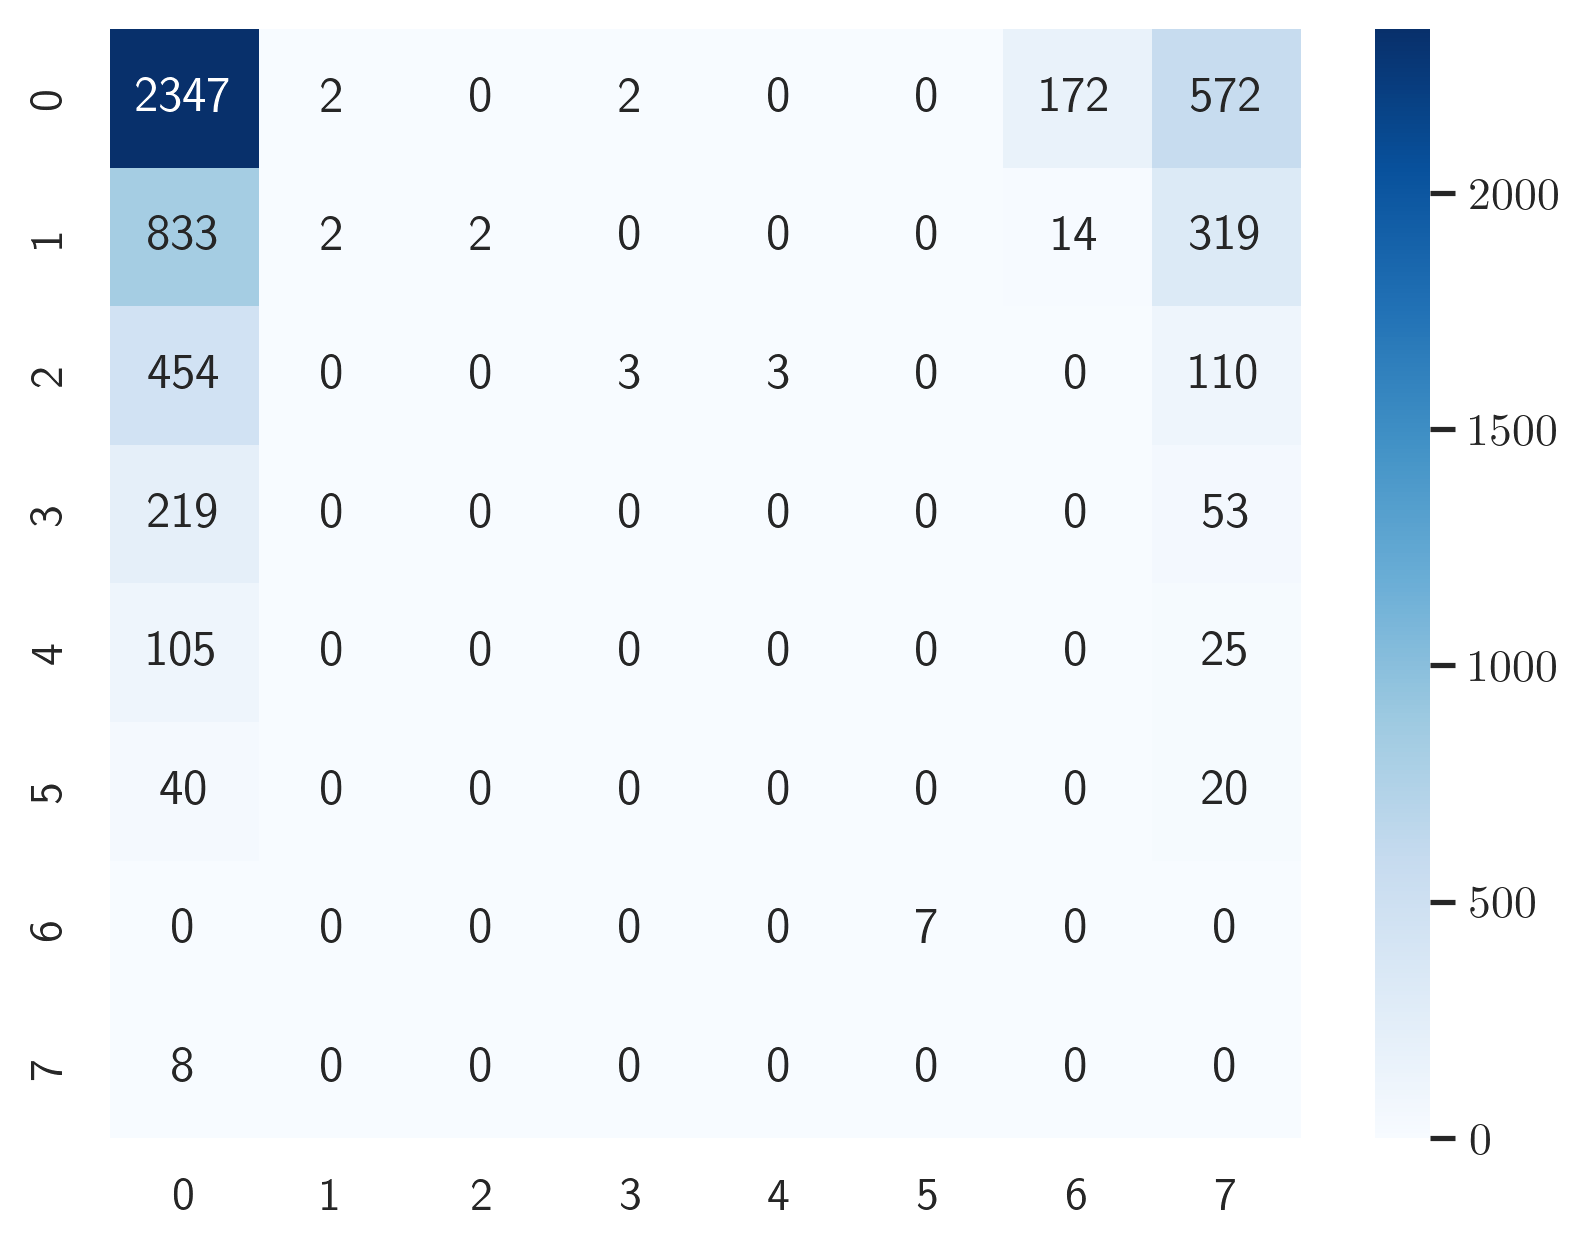

In [133]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels+1)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [134]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

/Users/kimberlyharris/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


In [135]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

In [136]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

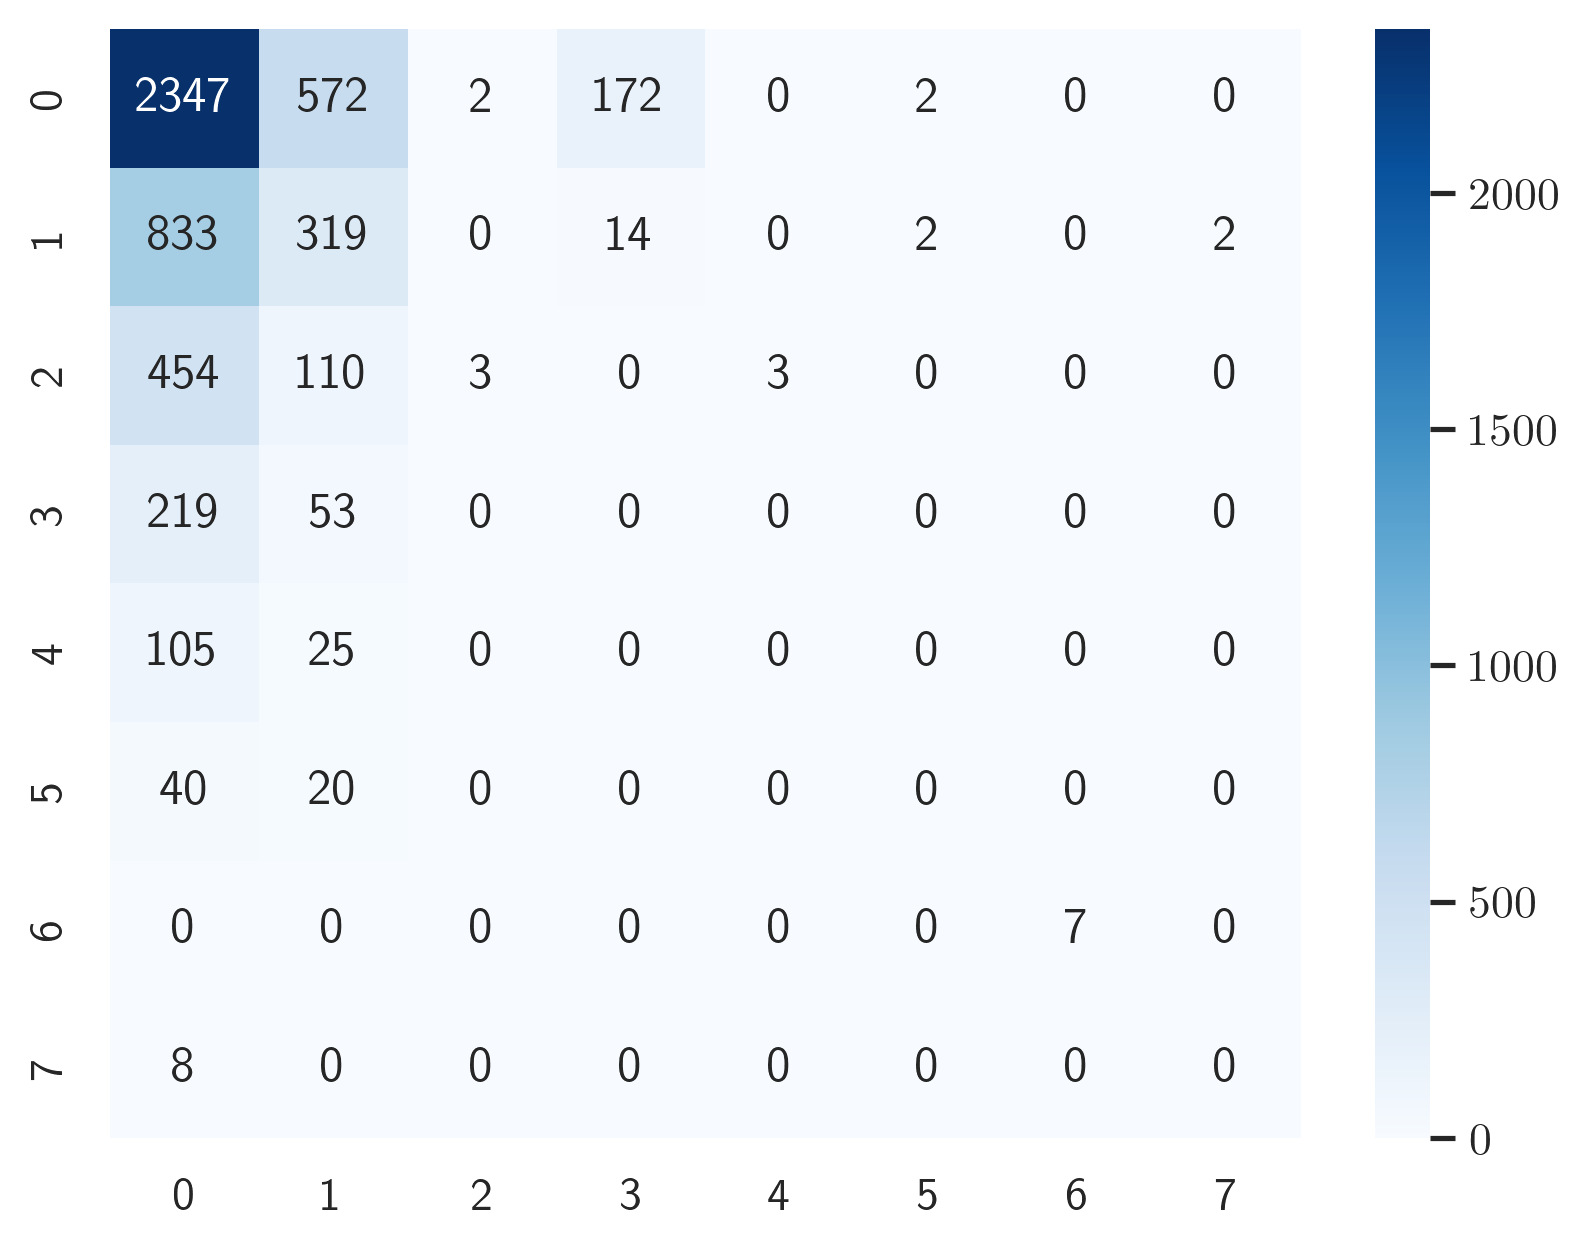

In [137]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [138]:
labels_list=labels_list+acc*fixed

In [139]:
accuracy_list

[0.3490210843373494,
 0.43317018072289154,
 0.3678463855421687,
 0.3772590361445783,
 0.40606174698795183,
 0.3672816265060241,
 0.39118975903614456,
 0.3533509036144578,
 0.5037650602409639]

In [140]:
labels_list

0       10.539533
1       10.539533
2       10.298193
3       10.298193
4       10.539533
          ...    
5307    10.298193
5308    10.298193
5309    10.298193
5310    10.539533
5311    10.539533
Length: 5312, dtype: float64

## Ward Clustering scipy

In [141]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

In [142]:
y = pdist(data_normalized)

In [143]:
Z = ward(y)

In [144]:
Z

array([[1.77100000e+03, 1.77200000e+03, 2.62582703e-10, 2.00000000e+00],
       [1.77300000e+03, 5.31200000e+03, 1.54824380e-09, 3.00000000e+00],
       [8.52000000e+02, 8.53000000e+02, 1.09790154e-04, 2.00000000e+00],
       ...,
       [1.05320000e+04, 1.06170000e+04, 1.13660130e+02, 1.32200000e+03],
       [1.06120000e+04, 1.06200000e+04, 1.47468700e+02, 2.28600000e+03],
       [1.06190000e+04, 1.06210000e+04, 2.24134308e+02, 5.31200000e+03]])

In [145]:
labels=fcluster(Z, 8, criterion='maxclust')

In [146]:
np.unique(labels)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

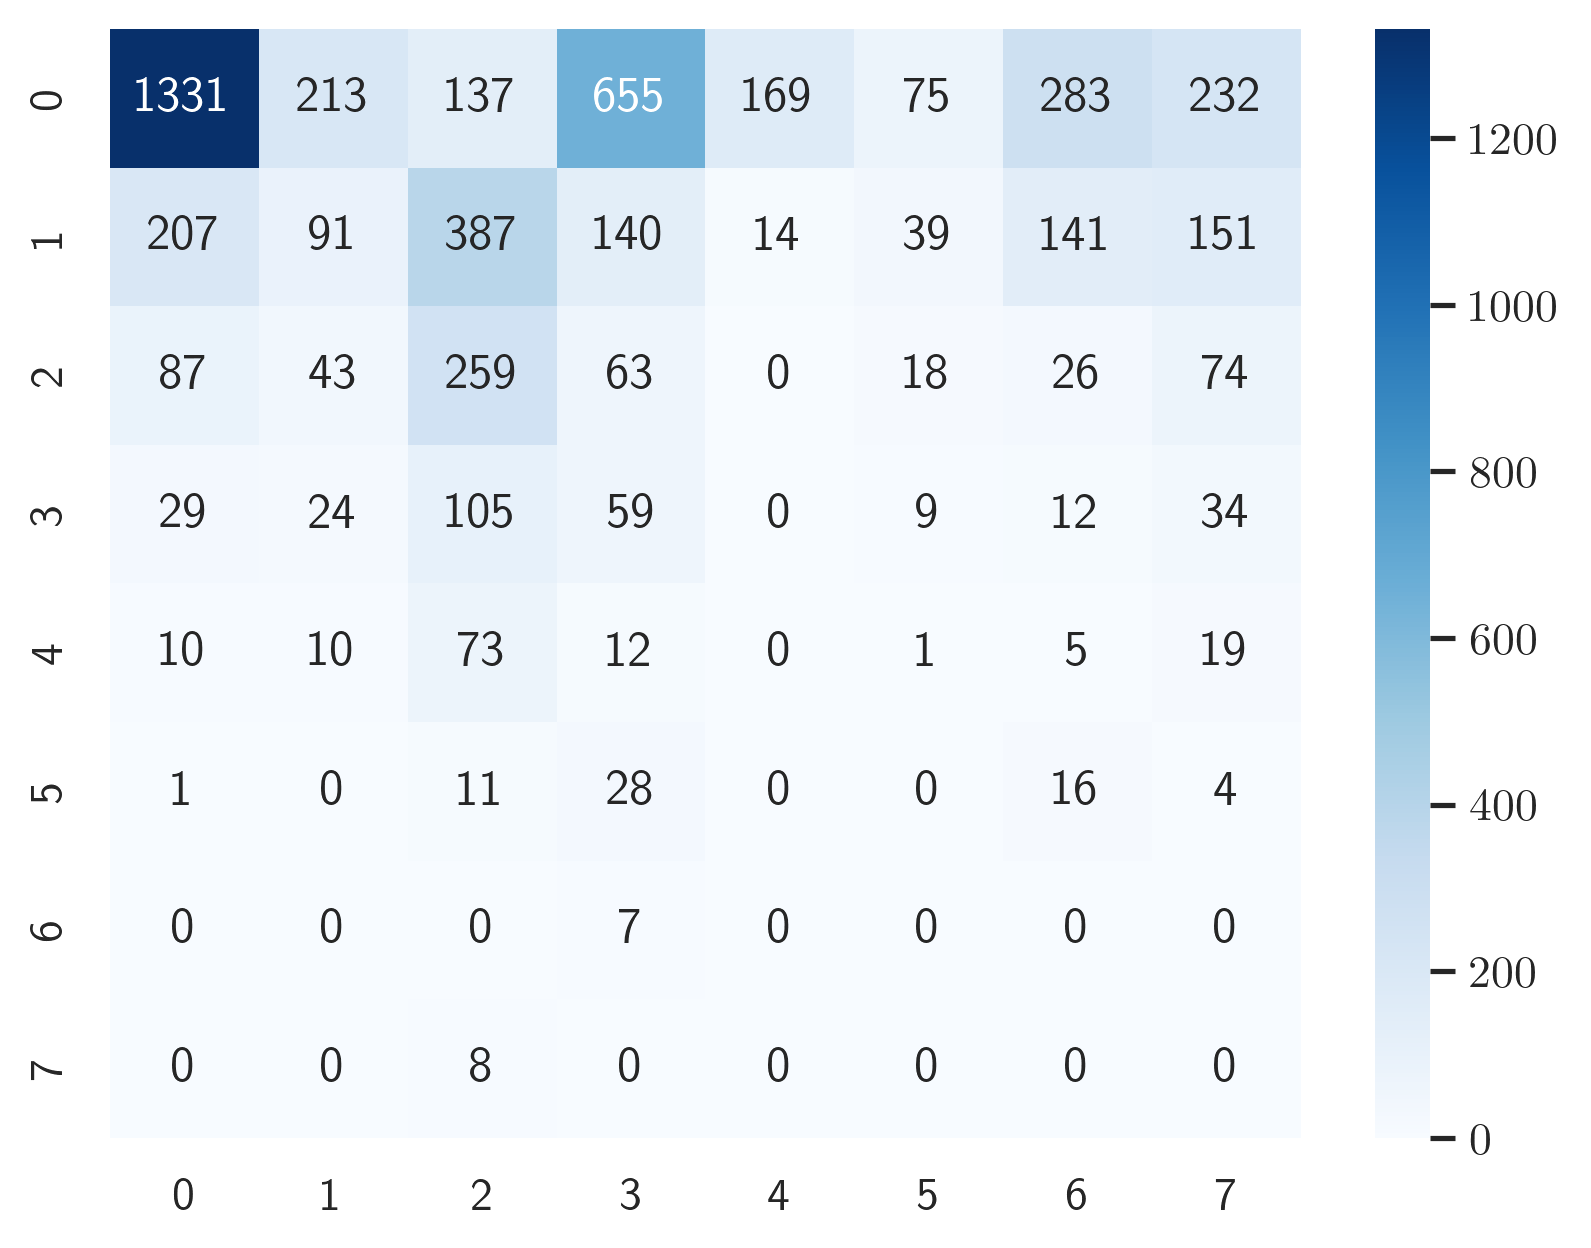

In [147]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, labels)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [148]:
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

In [149]:
acc=accuracy(data_normalized_copy["sy_pnum_asnum"], labels) #special one with optimization for labels to classes
accuracy_list.append(acc)

In [150]:
fixed = pd.Series(labels)
reordered=np.zeros(len(js))
for i in np.arange(len(js)):
    reordered[i]=np.unique(labels)[js[i]]
fixed=fixed.replace(reordered,np.unique(data_normalized_copy["sy_pnum_asnum"]))

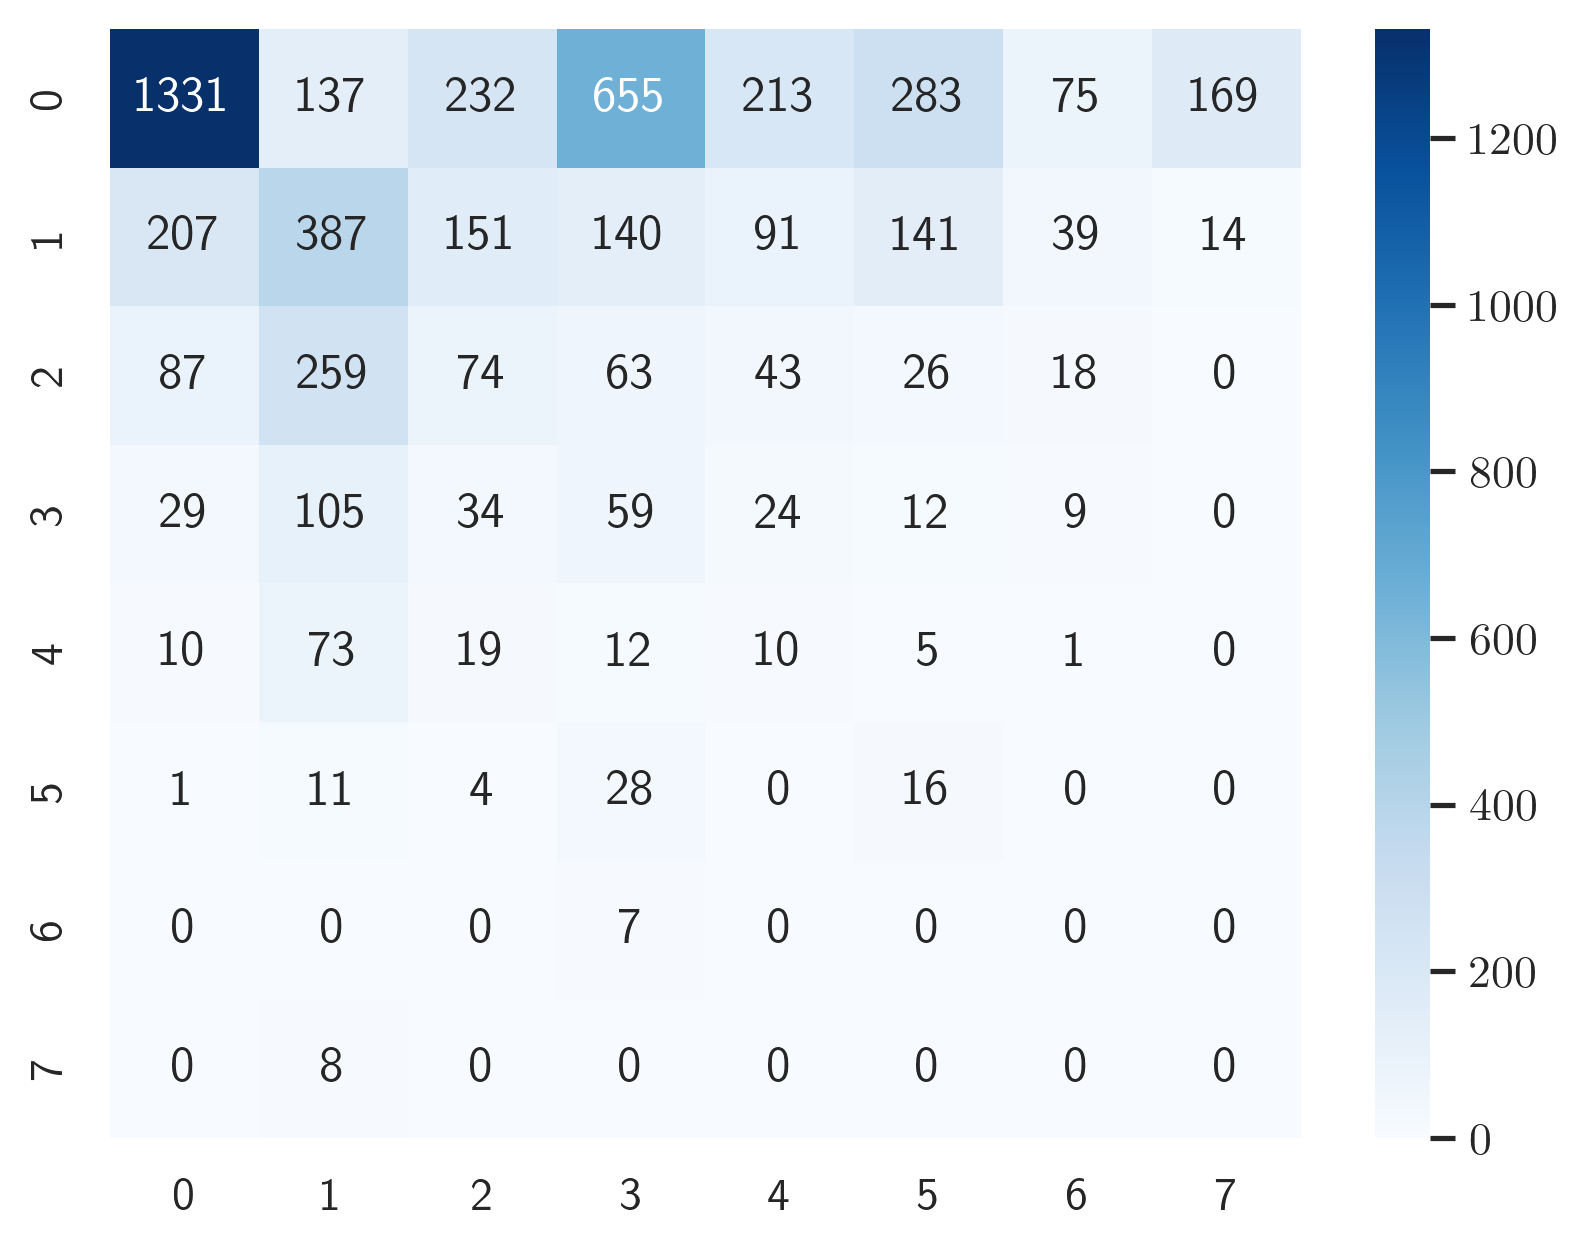

In [151]:
cm = confusion_matrix(data_normalized_copy["sy_pnum_asnum"].values, fixed)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [152]:
labels_list=labels_list+acc*fixed

In [153]:
accuracy_list

[0.3490210843373494,
 0.43317018072289154,
 0.3678463855421687,
 0.3772590361445783,
 0.40606174698795183,
 0.3672816265060241,
 0.39118975903614456,
 0.3533509036144578,
 0.5037650602409639,
 0.3533509036144578]

In [154]:
labels_list

0       12.659639
1       12.659639
2       11.358245
3       11.358245
4       12.659639
          ...    
5307    11.358245
5308    11.358245
5309    11.358245
5310    12.659639
5311    12.659639
Length: 5312, dtype: float64

## Ensemble learning done

In [155]:
path = '/Users/kimberlyharris/Documents/exoplanet_transit-main/alldata_analysis/part3_ensembledone/'
os.chdir(path)

In [156]:
accuracy_list

[0.3490210843373494,
 0.43317018072289154,
 0.3678463855421687,
 0.3772590361445783,
 0.40606174698795183,
 0.3672816265060241,
 0.39118975903614456,
 0.3533509036144578,
 0.5037650602409639,
 0.3533509036144578]

In [157]:
labels_list

0       12.659639
1       12.659639
2       11.358245
3       11.358245
4       12.659639
          ...    
5307    11.358245
5308    11.358245
5309    11.358245
5310    12.659639
5311    12.659639
Length: 5312, dtype: float64

In [158]:
labels_list/sum(accuracy_list)

0       3.244151
1       3.244151
2       2.910657
3       2.910657
4       3.244151
          ...   
5307    2.910657
5308    2.910657
5309    2.910657
5310    3.244151
5311    3.244151
Length: 5312, dtype: float64

In [159]:
ensemble=labels_list/sum(accuracy_list)

In [160]:
sum(accuracy_list)

3.9022966867469875

In [161]:
data_normalized

,default_flag,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,...,disc_telescope_asnum,discoverymethod_asnum,disc_instrument_asnum,pl_tsystemref_asnum,st_spectype_asnum,st_metratio_asnum,pl_bmassprov_asnum,pca_dim_1,pca_dim_2,pca_dim_3
0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.440000,0.8,0.244444,1.000000,0.712719,0.600000,0.666667,2.294510,1.134785,-1.321424
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413333,0.8,0.244444,1.000000,0.875731,0.466667,0.666667,2.173722,1.068315,-1.310701
2,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360000,0.8,0.455556,1.000000,0.750000,0.600000,0.666667,2.474929,1.631971,-0.644790
3,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.386667,0.8,0.466667,0.750000,0.879386,0.525000,0.583333,2.719732,0.300032,-0.189554
4,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.785714,0.771930,0.366667,0.666667,1.877171,0.847515,-1.467423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.573333,0.8,0.477778,0.775510,0.538847,0.571429,0.666667,2.517068,0.926074,-0.845333
5308,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.689538,0.695524,-0.266141
5309,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.687248,0.698397,-0.275237
5310,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360000,0.8,0.455556,0.714286,0.469298,0.200000,0.666667,2.328210,1.027627,-1.180701


In [162]:
ensemble

0       3.244151
1       3.244151
2       2.910657
3       2.910657
4       3.244151
          ...   
5307    2.910657
5308    2.910657
5309    2.910657
5310    3.244151
5311    3.244151
Length: 5312, dtype: float64

In [163]:
ensemble=ensemble.astype(int)

In [164]:
ensemble

0       3
1       3
2       2
3       2
4       3
       ..
5307    2
5308    2
5309    2
5310    3
5311    3
Length: 5312, dtype: int64

In [165]:
ensemble.max() #check to make sure max is 8

5

In [166]:
data_normalized.insert(len(data_normalized.columns),'label', ensemble)

In [167]:
data_normalized

,default_flag,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,...,discoverymethod_asnum,disc_instrument_asnum,pl_tsystemref_asnum,st_spectype_asnum,st_metratio_asnum,pl_bmassprov_asnum,pca_dim_1,pca_dim_2,pca_dim_3,label
0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.244444,1.000000,0.712719,0.600000,0.666667,2.294510,1.134785,-1.321424,3
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.244444,1.000000,0.875731,0.466667,0.666667,2.173722,1.068315,-1.310701,3
2,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.455556,1.000000,0.750000,0.600000,0.666667,2.474929,1.631971,-0.644790,2
3,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.466667,0.750000,0.879386,0.525000,0.583333,2.719732,0.300032,-0.189554,2
4,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.785714,0.771930,0.366667,0.666667,1.877171,0.847515,-1.467423,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.8,0.477778,0.775510,0.538847,0.571429,0.666667,2.517068,0.926074,-0.845333,2
5308,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.689538,0.695524,-0.266141,2
5309,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.687248,0.698397,-0.275237,2
5310,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.455556,0.714286,0.469298,0.200000,0.666667,2.328210,1.027627,-1.180701,3


In [168]:
data_normalized.to_csv(path+"part3_ensemble_done.csv") #FINAL REDUCED DATA TO USE

## Create the data files

In [169]:
y = data_normalized["label"]
X = data_normalized.drop(columns='label')

In [170]:
X

,default_flag,cb_flag,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,...,disc_telescope_asnum,discoverymethod_asnum,disc_instrument_asnum,pl_tsystemref_asnum,st_spectype_asnum,st_metratio_asnum,pl_bmassprov_asnum,pca_dim_1,pca_dim_2,pca_dim_3
0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.440000,0.8,0.244444,1.000000,0.712719,0.600000,0.666667,2.294510,1.134785,-1.321424
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413333,0.8,0.244444,1.000000,0.875731,0.466667,0.666667,2.173722,1.068315,-1.310701
2,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360000,0.8,0.455556,1.000000,0.750000,0.600000,0.666667,2.474929,1.631971,-0.644790
3,0.125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.386667,0.8,0.466667,0.750000,0.879386,0.525000,0.583333,2.719732,0.300032,-0.189554
4,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.785714,0.771930,0.366667,0.666667,1.877171,0.847515,-1.467423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.573333,0.8,0.477778,0.775510,0.538847,0.571429,0.666667,2.517068,0.926074,-0.845333
5308,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.689538,0.695524,-0.266141
5309,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.8,0.644444,0.738095,0.596491,0.633333,0.555556,2.687248,0.698397,-0.275237
5310,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360000,0.8,0.455556,0.714286,0.469298,0.200000,0.666667,2.328210,1.027627,-1.180701


In [171]:
y

0       3
1       3
2       2
3       2
4       3
       ..
5307    2
5308    2
5309    2
5310    3
5311    3
Name: label, Length: 5312, dtype: int64

In [172]:
X.to_csv(path+"X.csv") 
y.to_csv(path+"y.csv")

In [173]:
test_ratio=.2

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_ratio, random_state=256)

In [175]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [176]:
y_train

3506    1
4979    3
637     3
1988    1
3286    2
       ..
3699    1
3468    1
754     2
4510    1
1610    1
Name: label, Length: 4249, dtype: int64

In [177]:
y_test

4841    3
465     3
109     3
1446    1
876     2
       ..
3934    1
777     3
3154    2
1253    3
4128    1
Name: label, Length: 1063, dtype: int64

In [178]:
X_train.to_csv(path+"X_train.csv") 
X_test.to_csv(path+"X_test.csv") 
y_train.to_csv(path+"y_train.csv") 
y_test.to_csv(path+"y_test.csv")